In [14]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
import plotly.graph_objects as go

In [4]:
data = pd.read_csv('kegga.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [7]:
data.tail()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
666,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [8]:
data.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [12]:
data.shape

(667, 20)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<Axes: >

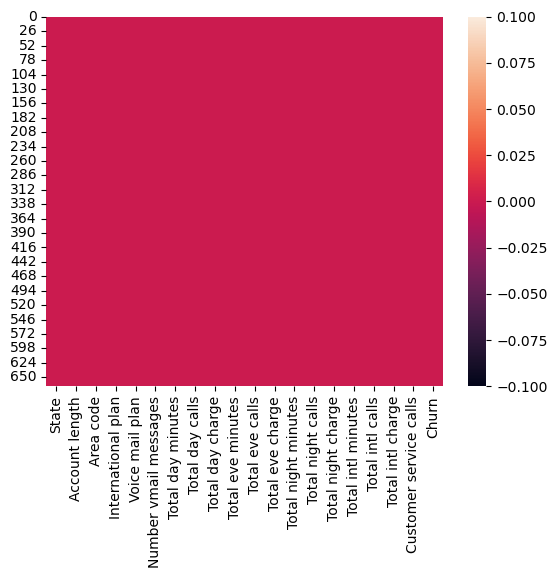

In [17]:
sns.heatmap(data.isnull())

In [18]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [19]:
# Check Unique Values for each variable.
for i in data.columns:
  print("No. of unique values in ",i,"is", data[i].nunique())

No. of unique values in  State is 51
No. of unique values in  Account length is 179
No. of unique values in  Area code is 3
No. of unique values in  International plan is 2
No. of unique values in  Voice mail plan is 2
No. of unique values in  Number vmail messages is 37
No. of unique values in  Total day minutes is 562
No. of unique values in  Total day calls is 100
No. of unique values in  Total day charge is 562
No. of unique values in  Total eve minutes is 557
No. of unique values in  Total eve calls is 94
No. of unique values in  Total eve charge is 528
No. of unique values in  Total night minutes is 568
No. of unique values in  Total night calls is 96
No. of unique values in  Total night charge is 453
No. of unique values in  Total intl minutes is 132
No. of unique values in  Total intl calls is 17
No. of unique values in  Total intl charge is 132
No. of unique values in  Customer service calls is 9
No. of unique values in  Churn is 2


In [20]:
# Write your code to make your dataset analysis ready.
print("No. of customers Churning :", data[data['Churn']==True].Churn.count()) # Total No of Customers Churning

# Variable Assigning to churned data
churn_df = data[data['Churn']==True]

# Total No of Unique Area Code
print("No of Unique Area Code :", data['Area code'].nunique())

# Customers On which Internaltion plan is activated
print("No of customer with international plan activated :", data[data['International plan']=='Yes']['International plan'].count())

# Customers On which Voice mail plan is activated
print("No of customer with Voice mail plan activated :", data[data['Voice mail plan']=='Yes']['Voice mail plan'].count())

data

No. of customers Churning : 95
No of Unique Area Code : 3
No of customer with international plan activated : 53
No of customer with Voice mail plan activated : 189


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [22]:
# % of total customers churning
print("Total no. of customers :", data.Churn.count())
perc_churn = (data.Churn.count()/data.Churn.count())*100
print(f"Percentage of customer churning : {round(perc_churn,2)}%")


Total no. of customers : 667
Percentage of customer churning : 100.0%


In [23]:
#Statewise customer churning
state_cust_churn = data.groupby(['State'])['Churn'].value_counts().reset_index(name='Churn_customer')
print(state_cust_churn.sum())
state_cust_churn

State             AKALALARAZAZCACACOCOCTCTDCDEDEFLFLGAHIHIIAIDID...
Churn                                                            42
Churn_customer                                                  667
dtype: object


,State,Churn,Churn_customer
0,AK,False,9
1,AL,False,13
2,AL,True,1
3,AR,False,8
4,AZ,False,18
...,...,...,...
88,WI,True,3
89,WV,False,15
90,WV,True,3
91,WY,False,10


In [24]:
# Account length wise churn data
acc_len_churn = data.groupby(['Account length'])['Churn'].value_counts().reset_index(name='values')
print(acc_len_churn.sum())
acc_len_churn

Account length    26261
Churn                73
values              667
dtype: int64


,Account length,Churn,values
0,1,False,2
1,3,False,1
2,6,False,1
3,7,False,1
4,10,False,1
...,...,...,...
245,209,False,1
246,209,True,1
247,215,False,1
248,217,False,1


In [25]:
# Area Code wise churn Percentage
Area_code_churn_perc = (data.groupby(['Area code'])['Churn'].mean()*100).reset_index()
Area_code_churn_perc

,Area code,Churn
0,408,16.568047
1,415,12.166172
2,510,16.149068


In [26]:
# Area code wise Churn Count
Area_code_churn_count = data.groupby(['Area code'])['Churn'].value_counts().reset_index(name='Counts')
Area_code_churn_count

,Area code,Churn,Counts
0,408,False,141
1,408,True,28
2,415,False,296
3,415,True,41
4,510,False,135
5,510,True,26


In [27]:
#Poor Connectivity by intersection of state by area code
Area_state_churn = data.groupby(['Area code'])['State'].unique().reset_index(name='Unique state')
Area_state_churn

,Area code,Unique state
0,408,"[LA, AK, VA, KY, ID, CA, WA, OH, NH, AZ, FL, K..."
1,415,"[IN, NY, SC, MI, ID, WI, HI, MN, LA, MT, MA, C..."
2,510,"[HI, MN, VT, MI, MO, AL, TX, WY, NM, SC, OK, O..."


In [28]:
# Assigning the list of state of each area
Area_408_state_churn = Area_state_churn.loc[0,'Unique state']
Area_415_state_churn = Area_state_churn.loc[1,'Unique state']
Area_510_state_churn = Area_state_churn.loc[2,'Unique state']

inter_1= set(Area_408_state_churn).intersection(set(Area_415_state_churn))
poor_connectivity_states = set(inter_1).intersection(set(Area_510_state_churn))

print(f"Intersection by different areas code of churning gives {len(poor_connectivity_states)} poor connectivity states")
print("Try to short down the list of state by different dataset to generate more precise poor connectivity states")

Intersection by different areas code of churning gives 45 poor connectivity states
Try to short down the list of state by different dataset to generate more precise poor connectivity states


In [29]:
# Percentage of Customers with and without international Plan churning to other networks
intl_plan_churn = (data.groupby(['International plan'])['Churn'].mean()*100).reset_index(name='Churn %')
print(intl_plan_churn)

# Total number of Customers churning with international plan
churn_intl_yes = data[data['International plan']=='Yes']
print(f"No of Customers churning having International plan is {churn_intl_yes['International plan'].value_counts()[0]}")

# Total number of Customers churning without international plan
churn_intl_no = data[data['International plan']=='No']
print(f"No of Customers churning without having International plan is {churn_intl_no['International plan'].value_counts()[0]}")


  International plan    Churn %
0                 No  12.377850
1                Yes  35.849057
No of Customers churning having International plan is 53
No of Customers churning without having International plan is 614


In [30]:
# Percentage of People with and without Voice mail Plan churning to other networks
vmail_plan_churn = (data.groupby(['Voice mail plan'])['Churn'].mean()*100).reset_index(name='Churn %')
print(vmail_plan_churn)

# Total number of people churning with vmail plan
churn_vmail_yes = data[data['Voice mail plan']=='Yes']
print(f"No of Customers churning having vmail plan is {churn_vmail_yes['Voice mail plan'].value_counts()[0]}")

# Total number of people churning without vmail plan
churn_vmail_no = data[data['Voice mail plan']=='No']
print(f"No of Customers churning not having vmail plan is {churn_vmail_no['Voice mail plan'].value_counts()[0]}")


  Voice mail plan    Churn %
0              No  16.736402
1             Yes   7.936508
No of Customers churning having vmail plan is 189
No of Customers churning not having vmail plan is 478


In [31]:
# Customers churning having intl plan and vmail plan
intl_vmail_yes = data[(data['International plan'] == 'Yes') & (churn_df['Voice mail plan'] == 'Yes')]
if len(intl_vmail_yes) > 0:
    print(f"No of Customers churning having intl and vmail plan are {intl_vmail_yes['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with both intl plan and vmail plan.")

# Customers churning having no intl plan and no vmail plan
intl_vmail_no = data[(data['International plan'] == 'No') & (churn_df['Voice mail plan'] == 'No')]
if len(intl_vmail_no) > 0:
    print(f"No of Customers churning having no intl plan and no vmail plan are {intl_vmail_no['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with neither intl plan nor vmail plan.")

# Customers churning having intl plan but no vmail plan
intl_yes_vmail_no = data[(data['International plan'] == 'Yes') & (churn_df['Voice mail plan'] == 'No')]
if len(intl_yes_vmail_no) > 0:
    print(f"No of Customers churning having intl plan but no vmail plan are {intl_yes_vmail_no['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with intl plan but no vmail plan.")

# Customers churning having no intl plan but vmail plan
intl_no_vmail_yes = data[(data['International plan'] == 'No') & (churn_df['Voice mail plan'] == 'Yes')]
if len(intl_no_vmail_yes) > 0:
    print(f"No of Customers churning having no intl plan but vmail plan are {intl_no_vmail_yes['Churn'].value_counts().get(1, 0)}")
else:
    print("No customers churning with no intl plan but vmail plan.")


No of Customers churning having intl and vmail plan are 0
No of Customers churning having no intl plan and no vmail plan are 0
No of Customers churning having intl plan but no vmail plan are 0
No of Customers churning having no intl plan but vmail plan are 0


In [32]:
# Poor Connectivity States
# States Sorted with respect to international and voice mail plan
state_intl_vmail_yes=intl_vmail_yes['State'].unique()
state_intl_vmail_no =intl_vmail_no['State'].unique()
state_intl_yes_vmail_no= intl_yes_vmail_no['State'].unique()
state_intl_no_vmail_yes= intl_no_vmail_yes['State'].unique()

# Intersection of 4 types of plan made
inter_1 = set(state_intl_vmail_yes).intersection(set(state_intl_vmail_no))
inter_2 = set(state_intl_yes_vmail_no).intersection(set(state_intl_no_vmail_yes))
Intersection =set(inter_1).intersection(set(inter_2))
print(f"List of poor connectivity states are : {list(Intersection)}")

List of poor connectivity states are : []


In [33]:
# Percentage of People with number of Voice mail messages churning/not-churning to other networks
vmail_mssg_churn = data.groupby(['Churn'])['Number vmail messages'].mean().reset_index(name='perc_vmail_mssg')
vmail_mssg_churn

,Churn,perc_vmail_mssg
0,False,8.991259
1,True,4.894737


In [34]:
# Day Data
# Percentage of people churning with the average day mins,calls and charge.
data.groupby(['Churn'])['Total day minutes'].mean().reset_index(name='perc_day_mins')


,Churn,perc_day_mins
0,False,175.460140
1,True,213.991579


In [35]:
data.groupby(['Churn'])['Total day calls'].mean().reset_index(name='perc_day_calls')

,Churn,perc_day_calls
0,False,100.776224
1,True,101.905263


In [36]:
data.groupby(['Churn'])['Total day charge'].mean().reset_index(name='perc_day_charge')

,Churn,perc_day_charge
0,False,29.828829
1,True,36.379053


In [37]:
# Evening Data
# Percentage of people churning with the average Evening mins,calls and charge.
data.groupby(['Churn'])['Total eve minutes'].mean().reset_index(name='perc_eve_mins')

,Churn,perc_eve_mins
0,False,199.799650
1,True,224.764211


In [38]:
data.groupby(['Churn'])['Total eve calls'].mean().reset_index(name='perc_eve_calls')


,Churn,perc_eve_calls
0,False,100.047203
1,True,103.063158


In [39]:
data.groupby(['Churn'])['Total eve charge'].mean().reset_index(name='perc_eve_charge')

,Churn,perc_eve_charge
0,False,16.983024
1,True,19.105053


In [40]:
# Night Data
# Percentage of people churning with the average Night mins,calls and charge.
data.groupby(['Churn'])['Total night minutes'].mean().reset_index(name='perc_night_mins')

,Churn,perc_night_mins
0,False,198.815385
1,True,204.923158


In [41]:
data.groupby(['Churn'])['Total night calls'].mean().reset_index(name='perc_night_calls')

,Churn,perc_night_calls
0,False,100.258741
1,True,99.242105


In [42]:
data.groupby(['Churn'])['Total night charge'].mean().reset_index(name='perc_night_charge')

,Churn,perc_night_charge
0,False,8.946731
1,True,9.221789


In [43]:
# Intl Call Data
# Percentage of people churning with the average international mins,calls and charge.
data.groupby(['Churn'])['Total intl minutes'].mean().reset_index(name='perc_intl_mins')

,Churn,perc_intl_mins
0,False,10.242657
1,True,10.212632


In [44]:
data.groupby(['Churn'])['Total intl calls'].mean().reset_index(name='perc_intl_calls')

,Churn,perc_intl_calls
0,False,4.512238
1,True,4.621053


In [45]:
data.groupby(['Churn'])['Total intl charge'].mean().reset_index(name='perc_intl_charge')

,Churn,perc_intl_charge
0,False,2.766084
1,True,2.758105


In [47]:
# Combining of day,evening and night calls, mins and charges
data['Total calls'] = data.loc[:,['Total day calls','Total eve calls', 'Total night calls']].sum(axis=1)
data['Total mins'] = data.loc[:,['Total day minutes','Total eve minutes', 'Total night minutes']].sum(axis=1)
data['Total charge'] = data.loc[:,['Total day charge','Total eve charge', 'Total night charge']].sum(axis=1)

# mins per call
data['min_per_call'] = data['Total mins']/data['Total calls']

#charge per min
data['charge_per_min'] = data['Total charge']/data['Total mins']

# International mins per call
data['Intl_min_per_call'] = data['Total intl minutes']/data['Total intl calls']

#International charge per min
data['Intl_charge_per_min'] = data['Total intl charge']/data['Total intl minutes']


In [48]:
# Customer Service Call data
print("No of unique service calls made :", data['Customer service calls'].nunique())

# Percentage of churning based on the customer service calls made
(data.groupby(['Customer service calls'])['Churn'].mean()*100).reset_index(name='Perc_churned')

No of unique service calls made : 9


,Customer service calls,Perc_churned
0,0,9.154930
1,1,9.745763
2,2,16.556291
3,3,8.641975
4,4,36.363636
5,5,64.705882
6,6,80.000000
7,7,0.000000
8,8,0.000000


False    572
True      95
Name: Churn, dtype: int64
 


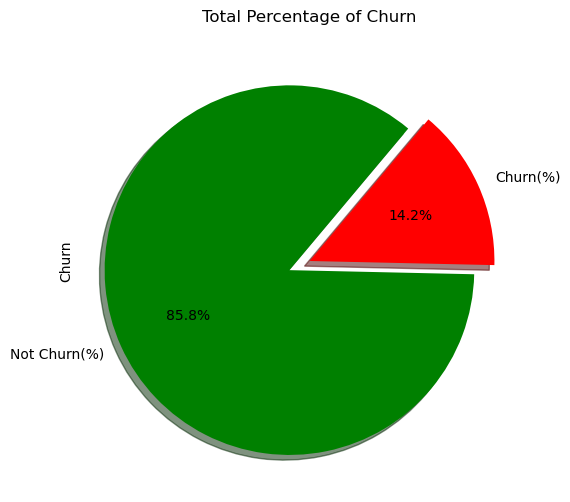

In [49]:
#data visualization

#Chart - 1  Dependent Column Value Counts
print(data.Churn.value_counts())
print(" ")

# Dependent Variable Column Visualization
data['Churn'].value_counts().plot( kind='pie',figsize=(10,6),
                                        autopct="%1.1f%%",
startangle=50,
shadow=True,
labels=['Not Churn(%)','Churn(%)'],
colors=['green','red'],explode=[0.12,0])
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

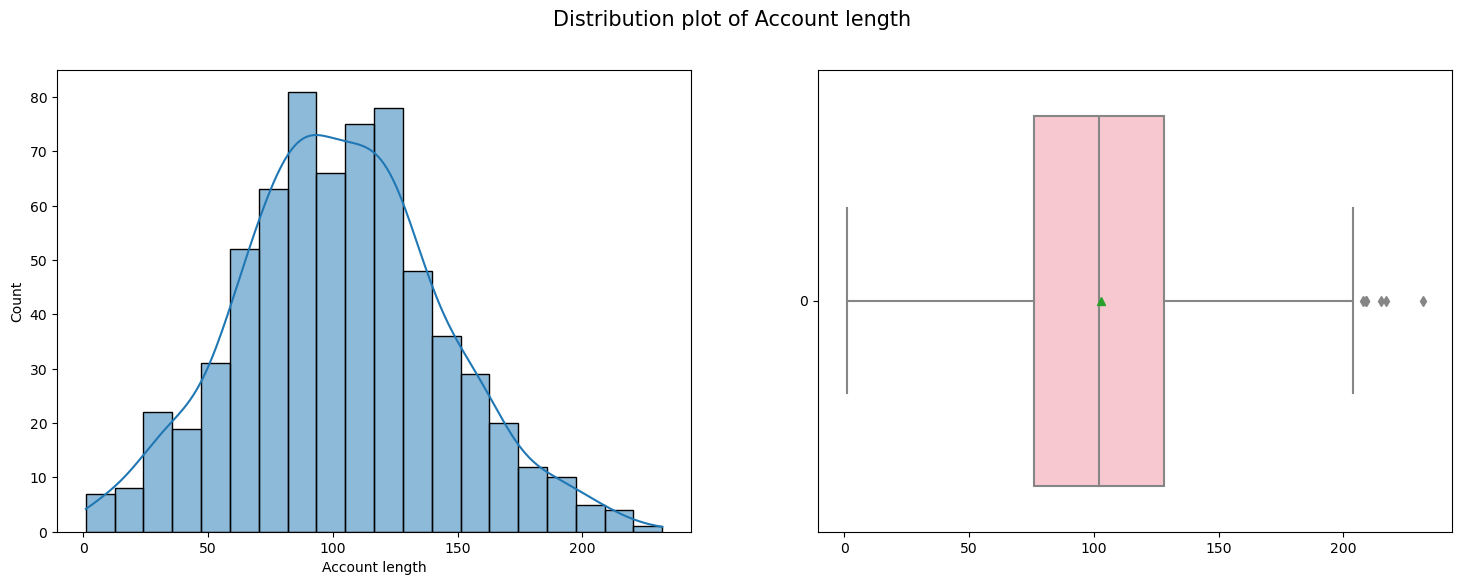

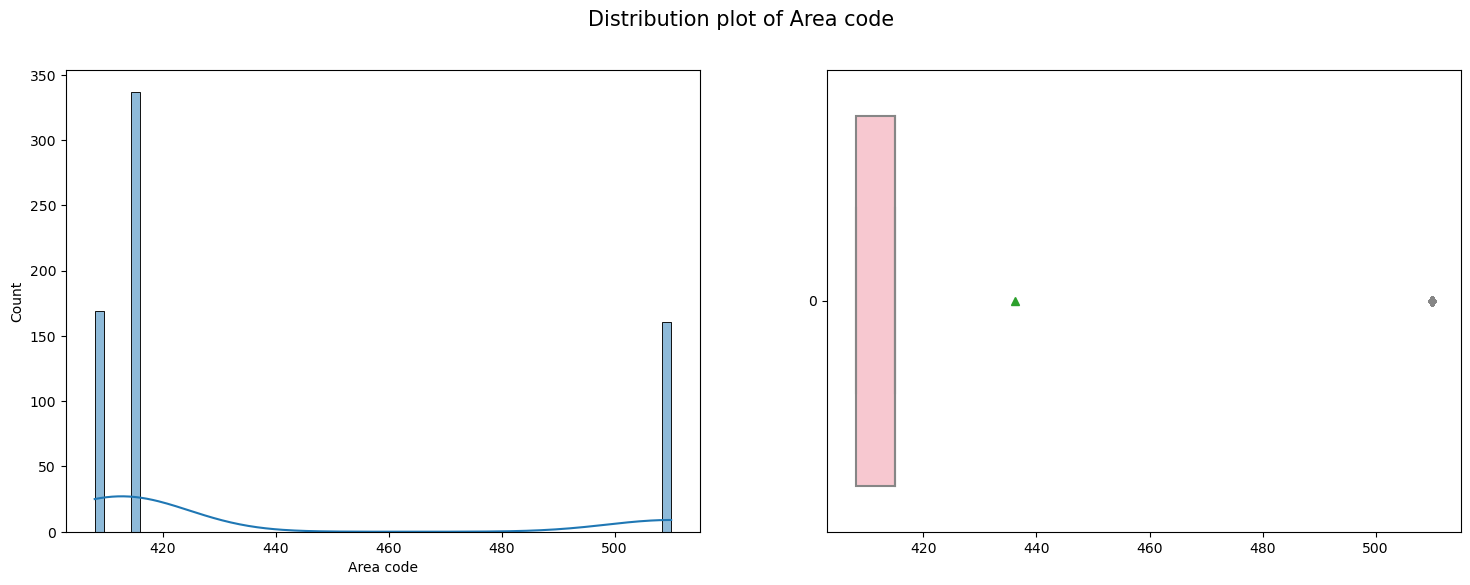

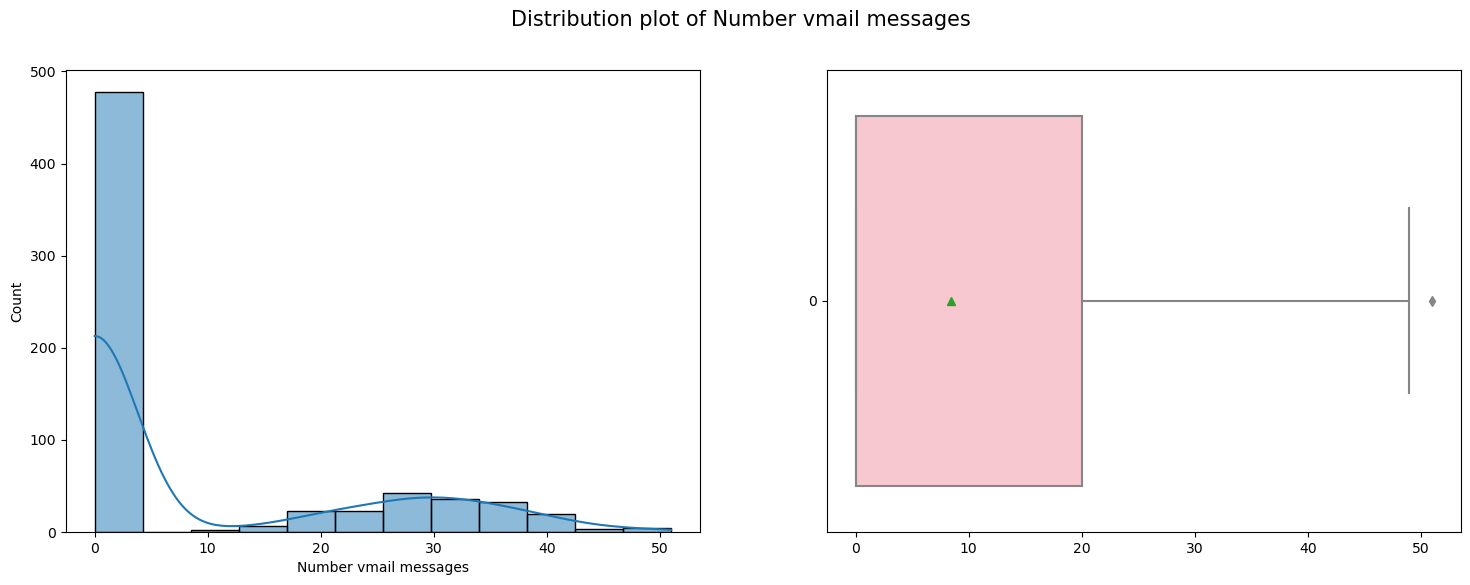

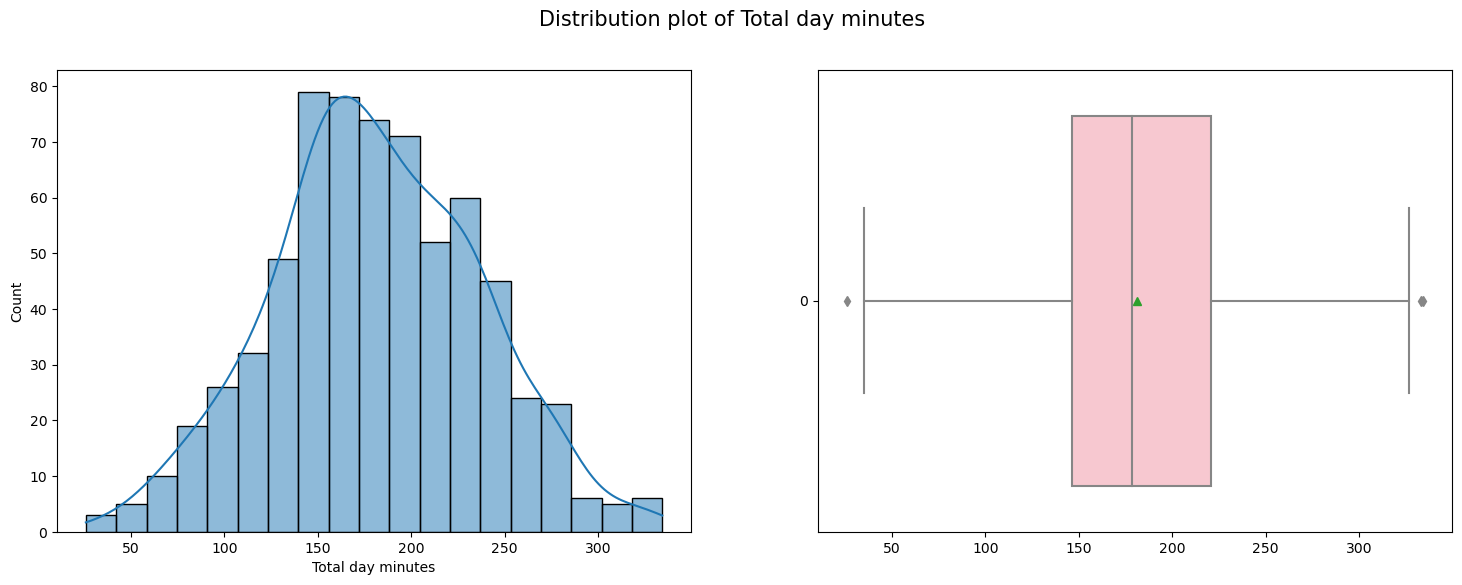

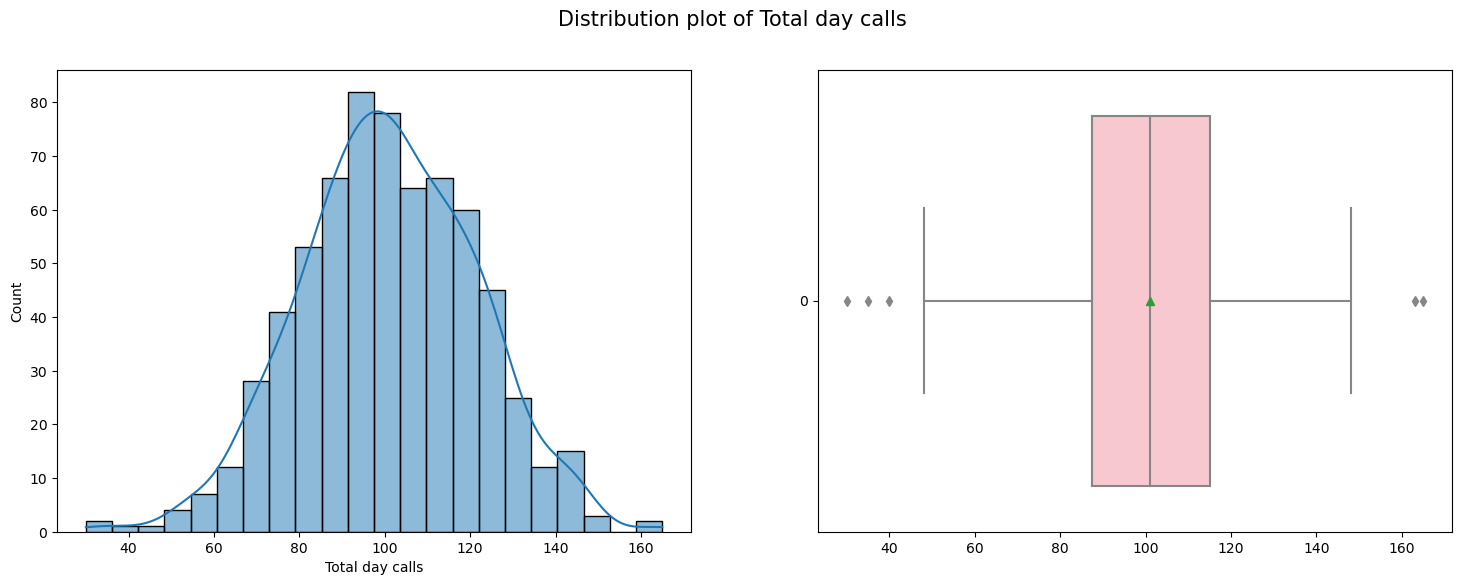

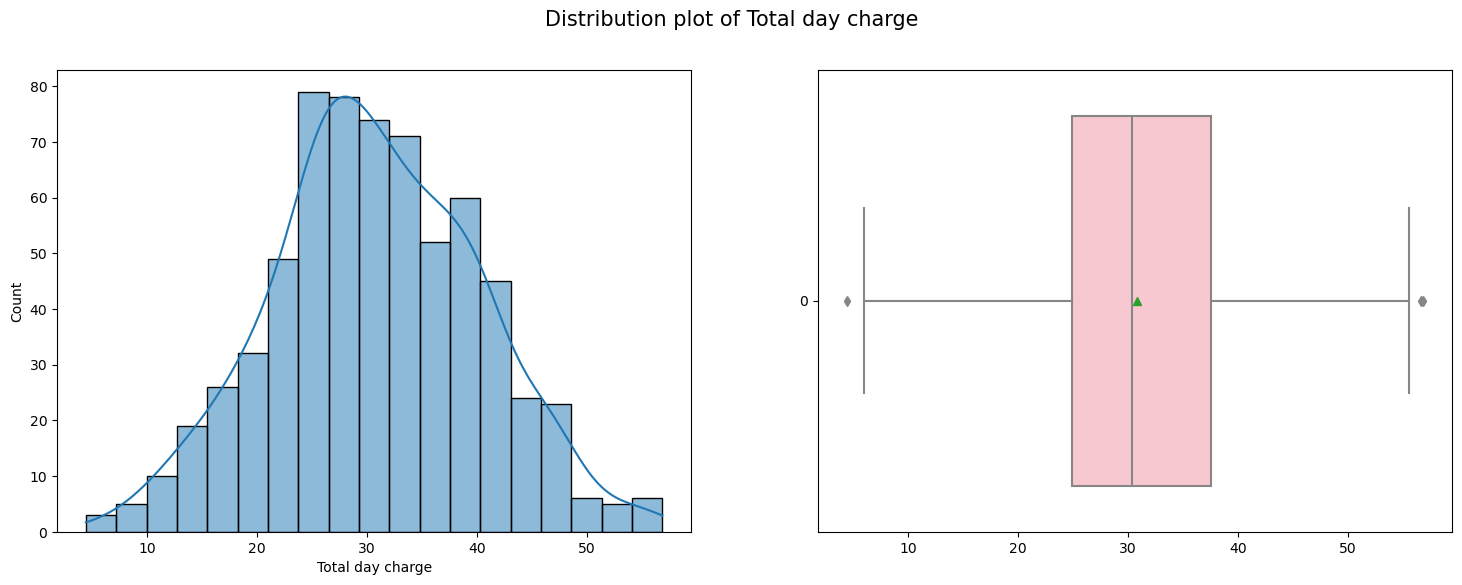

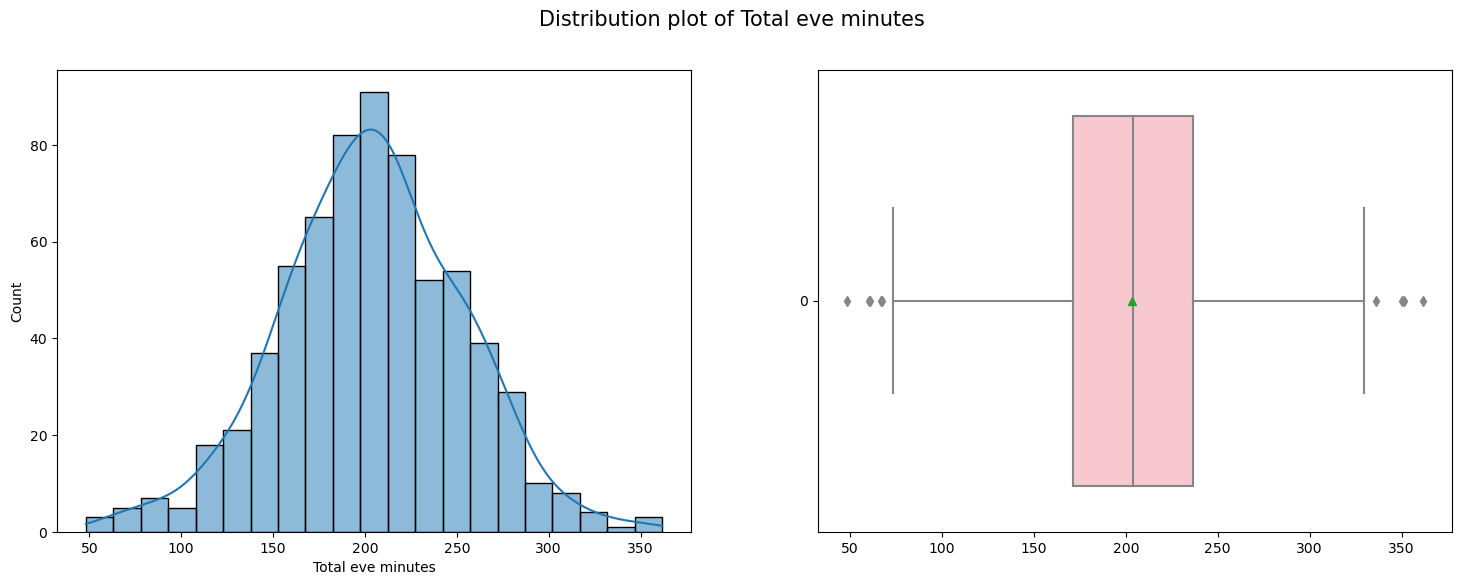

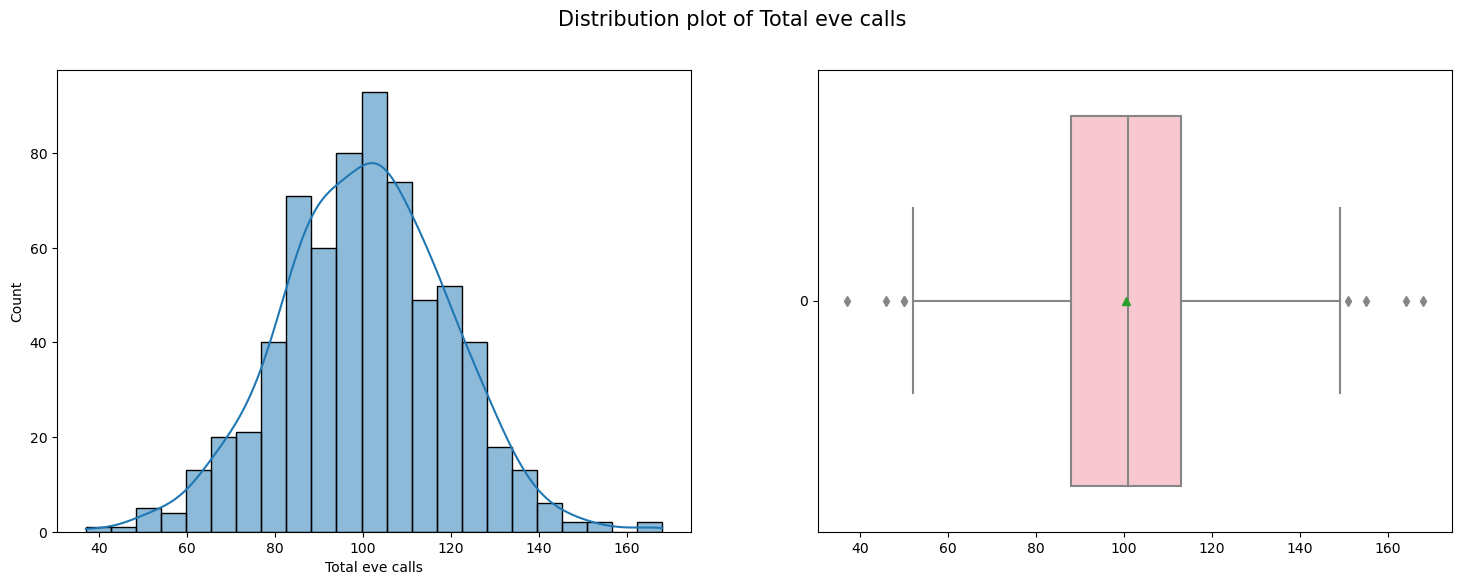

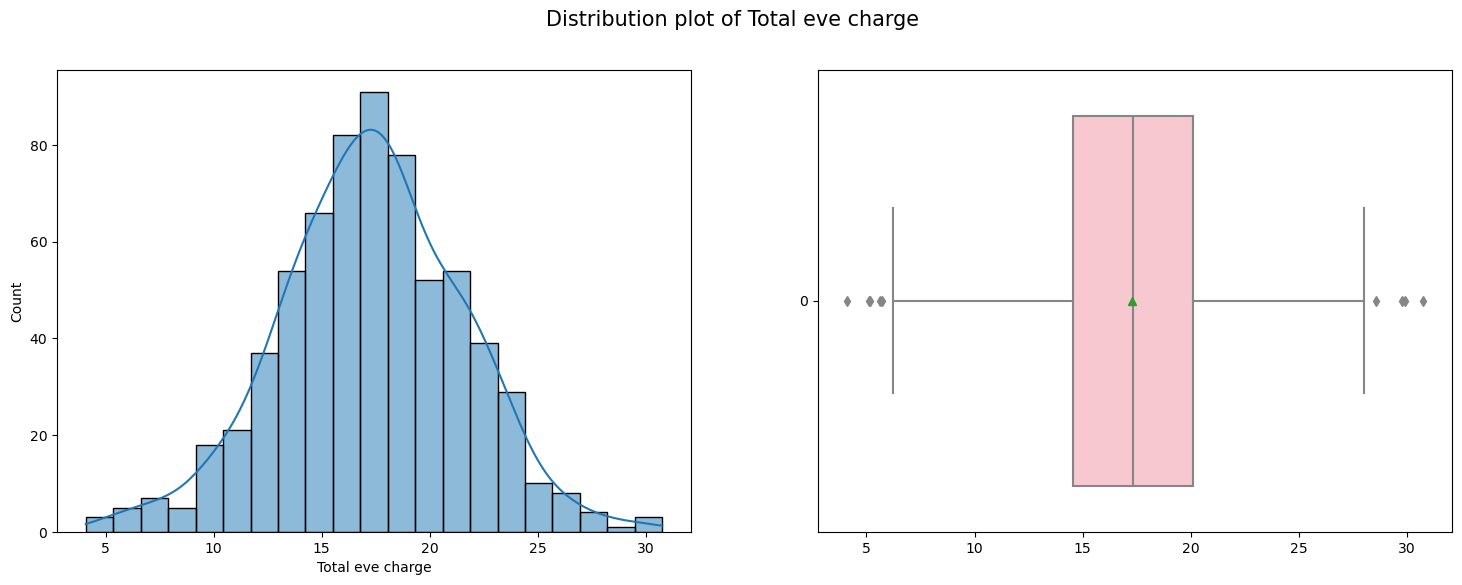

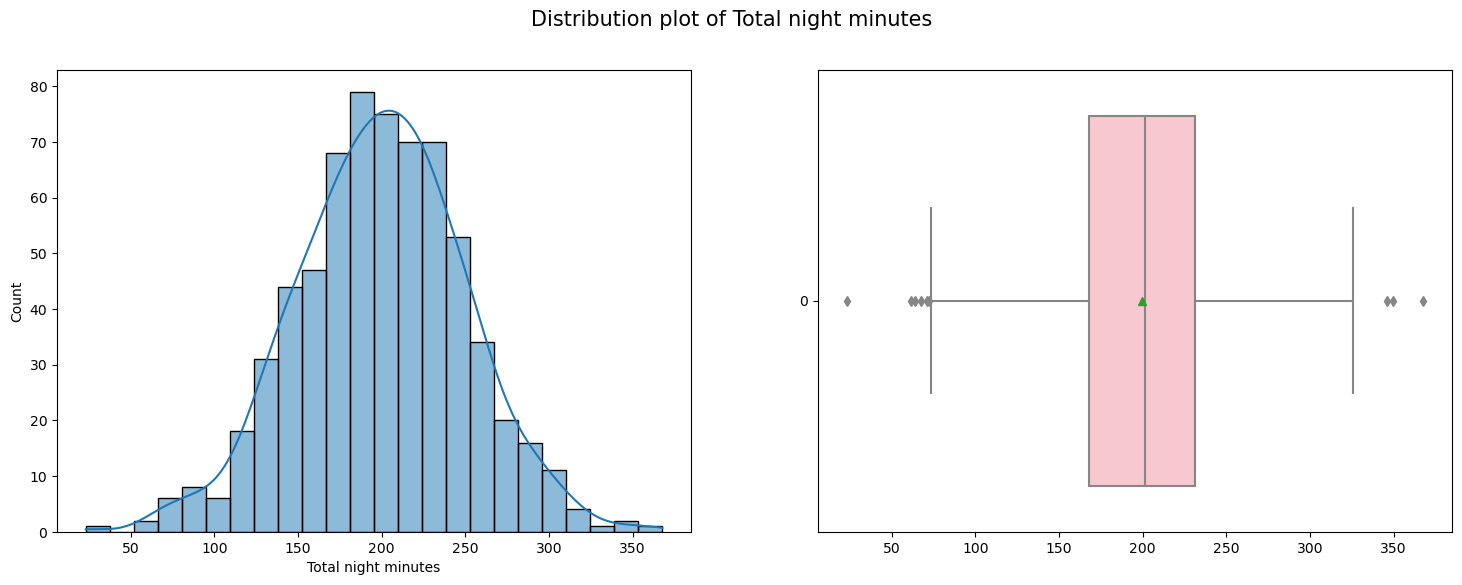

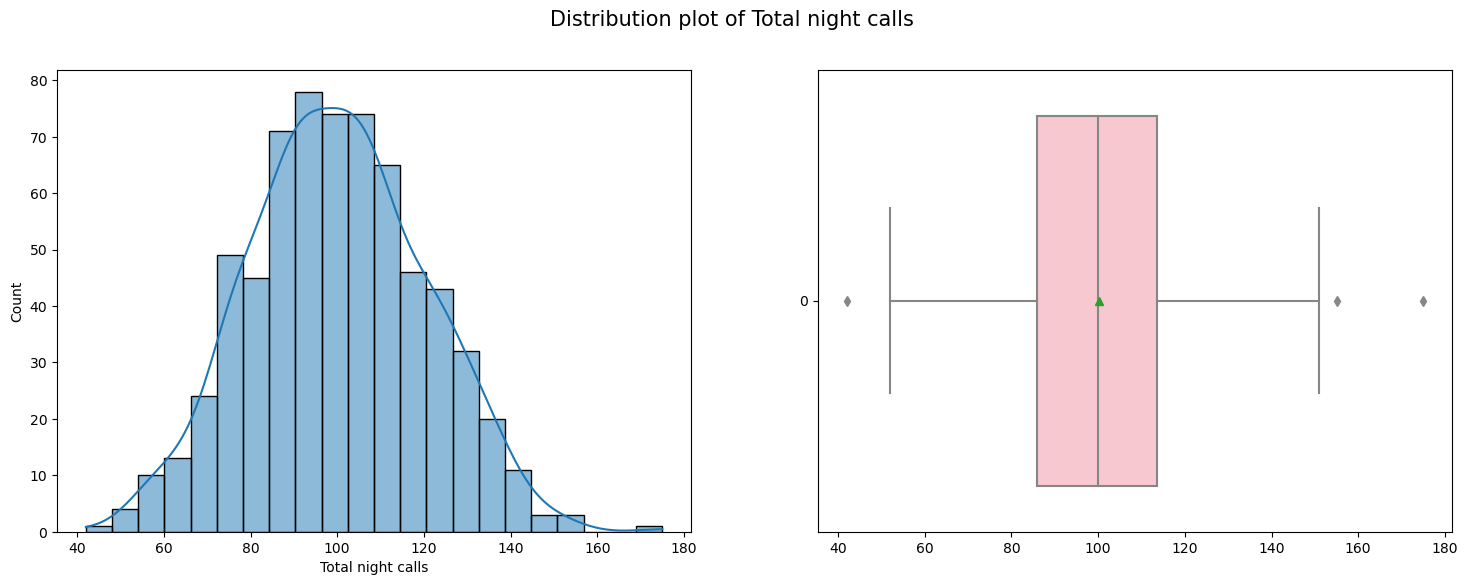

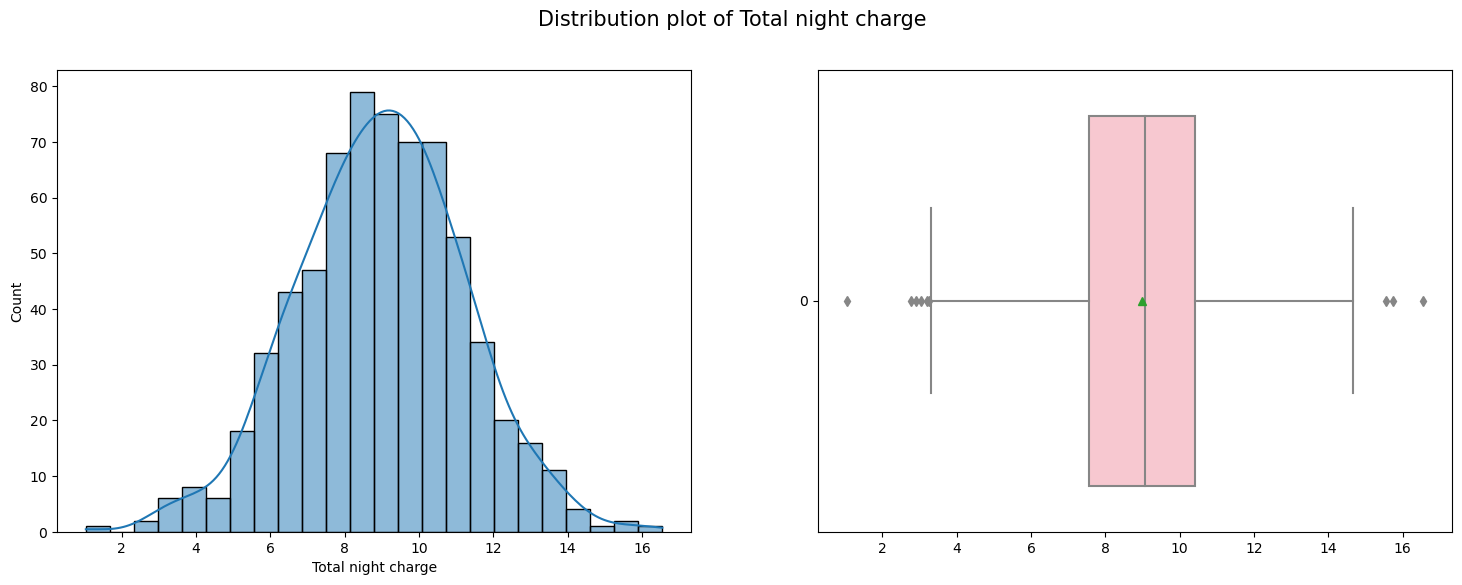

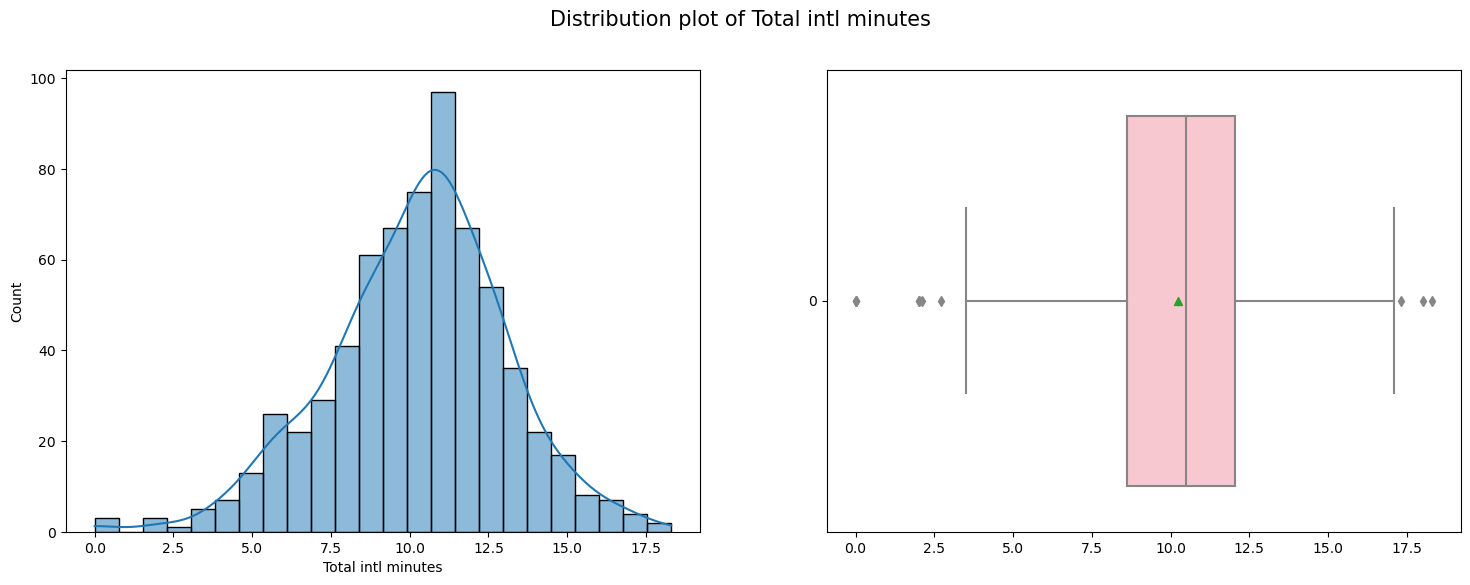

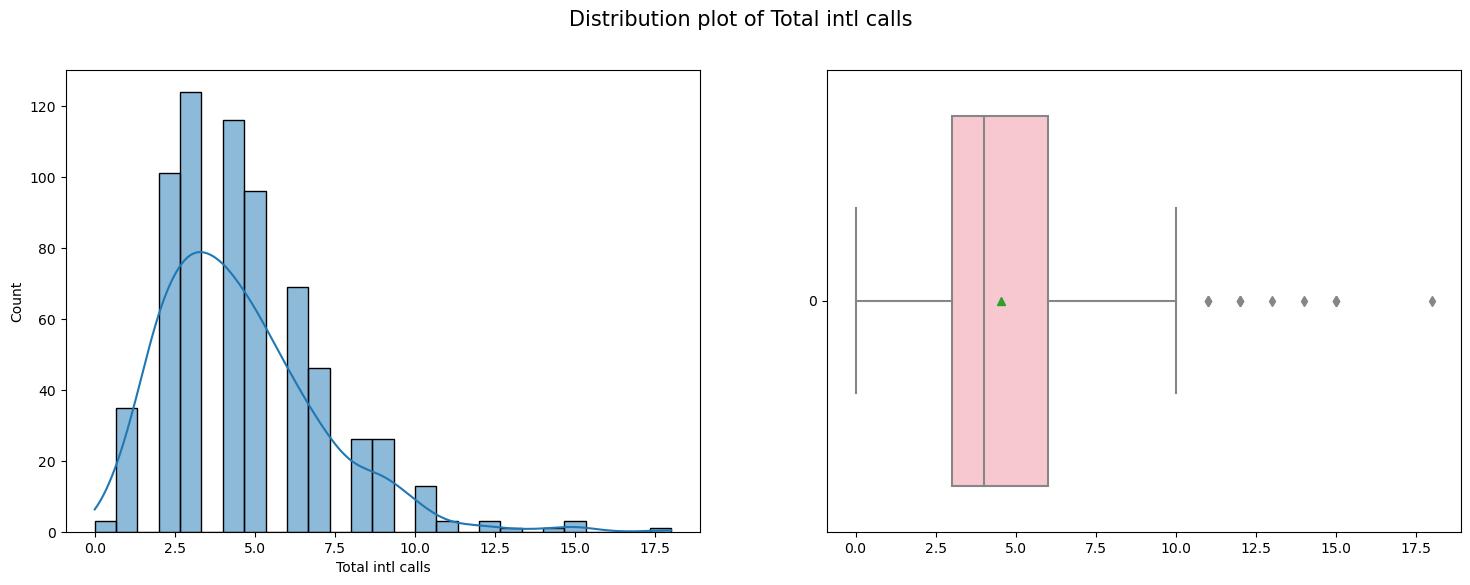

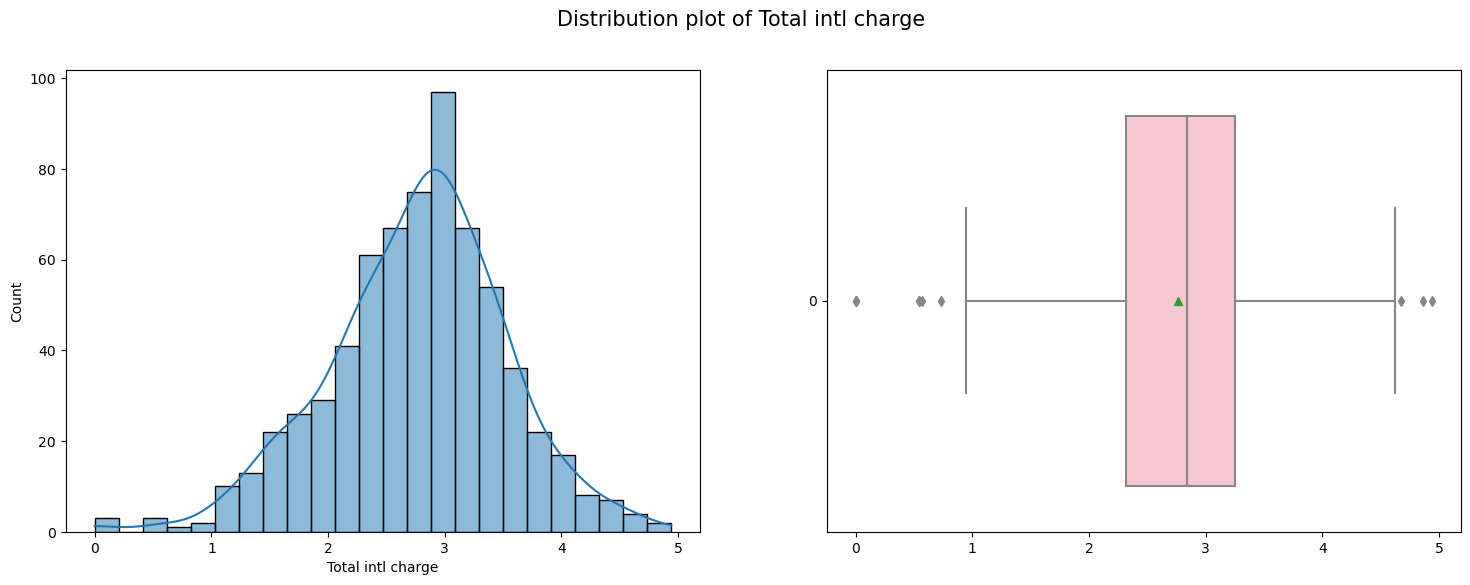

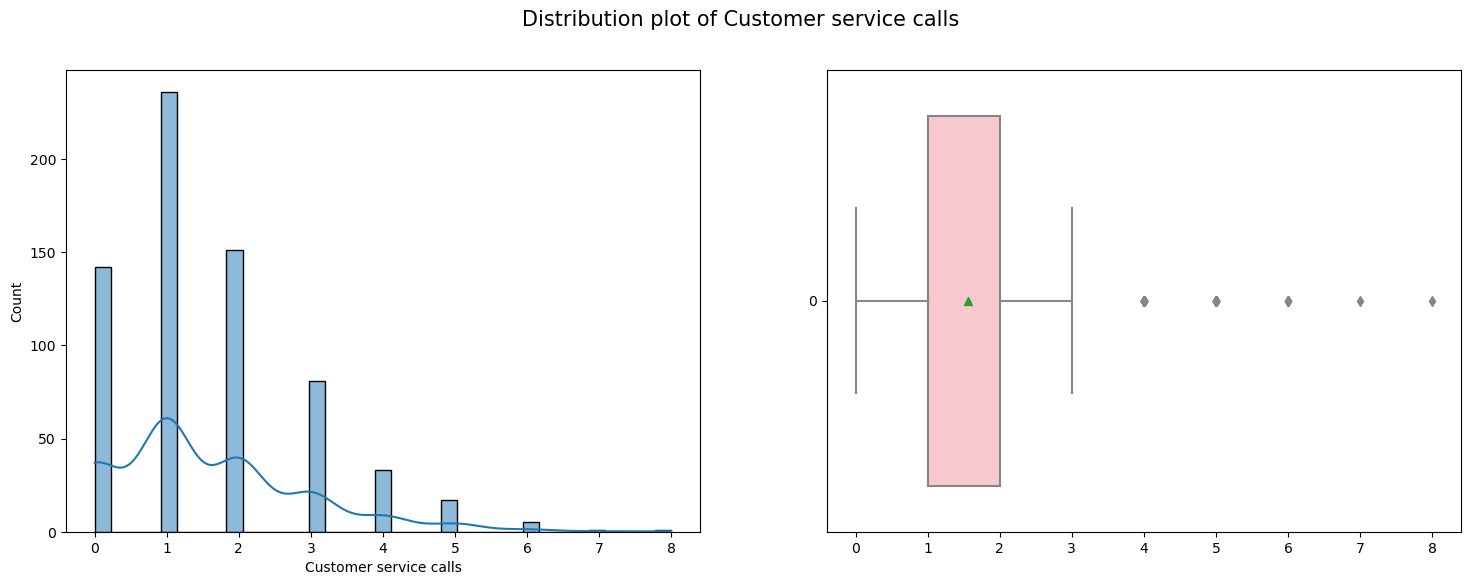

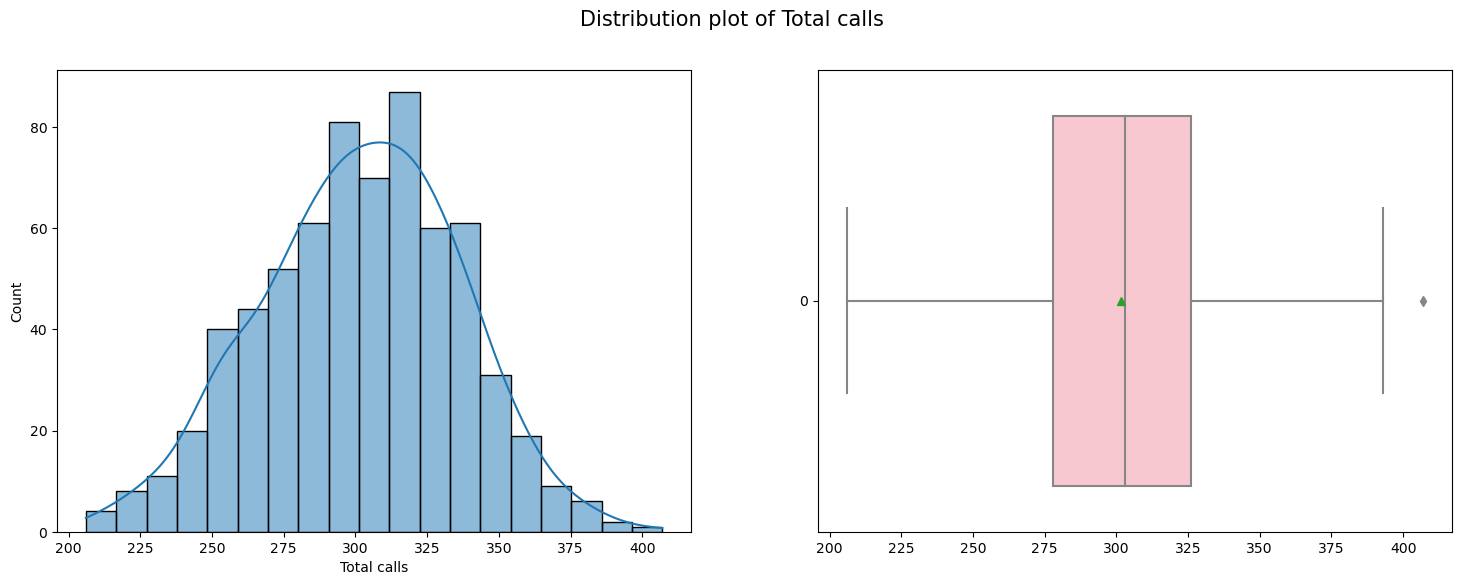

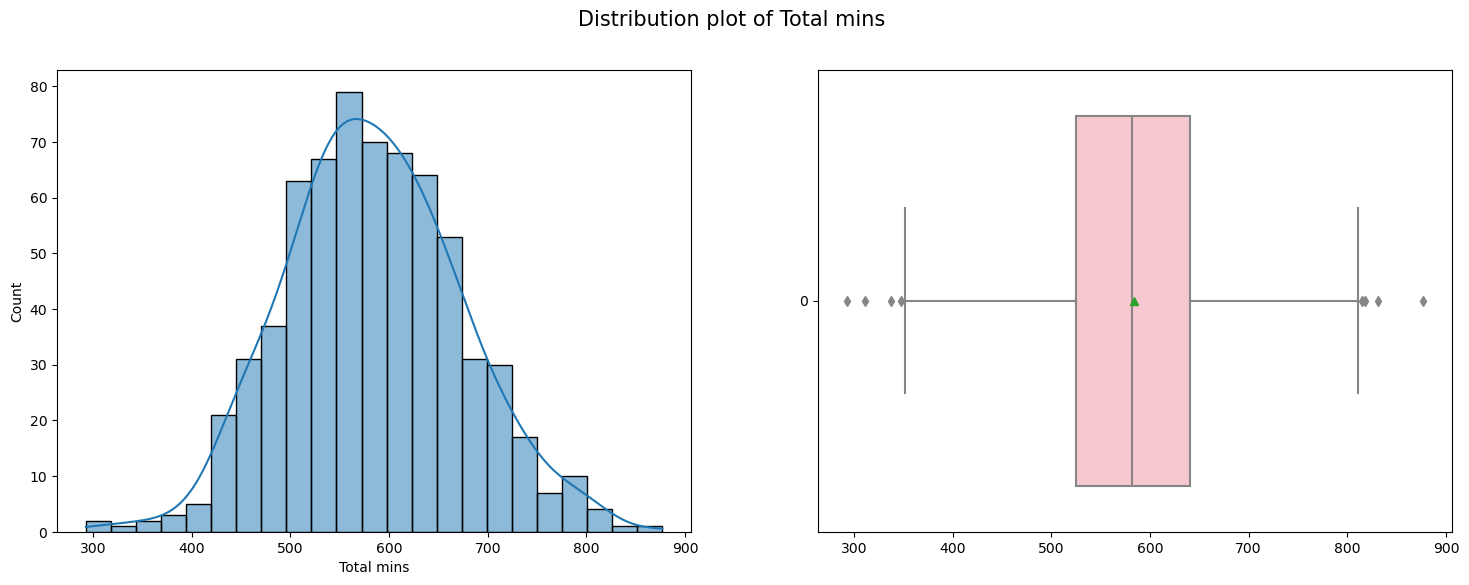

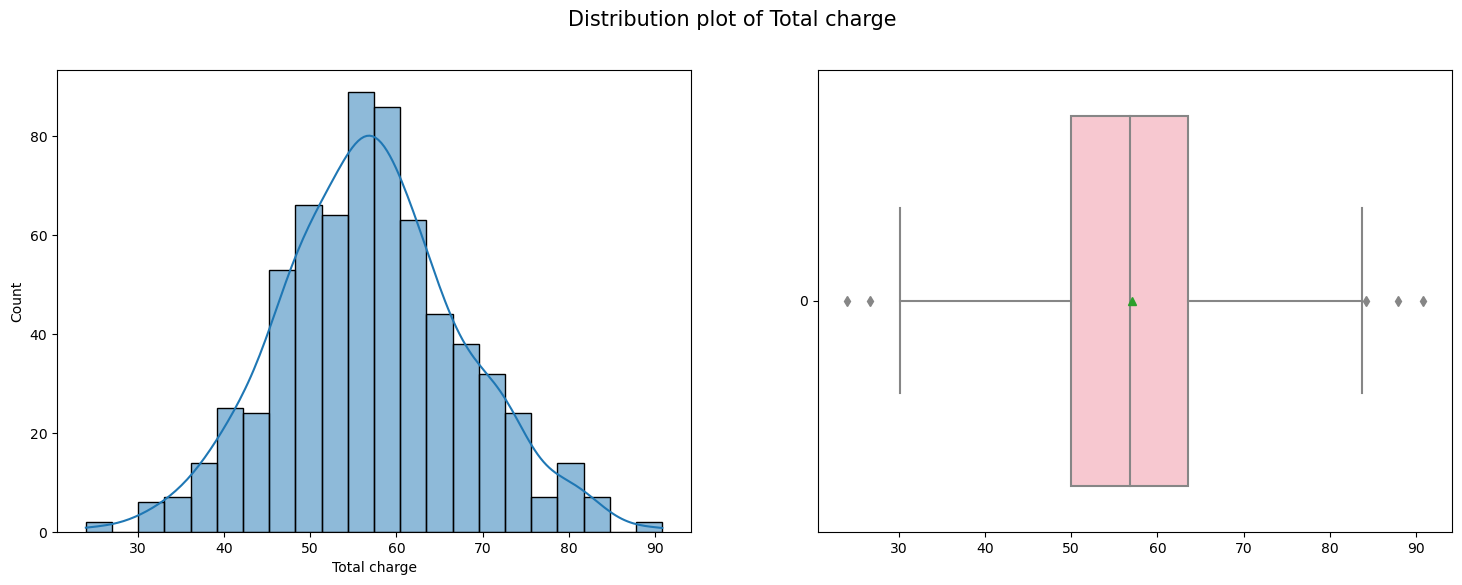

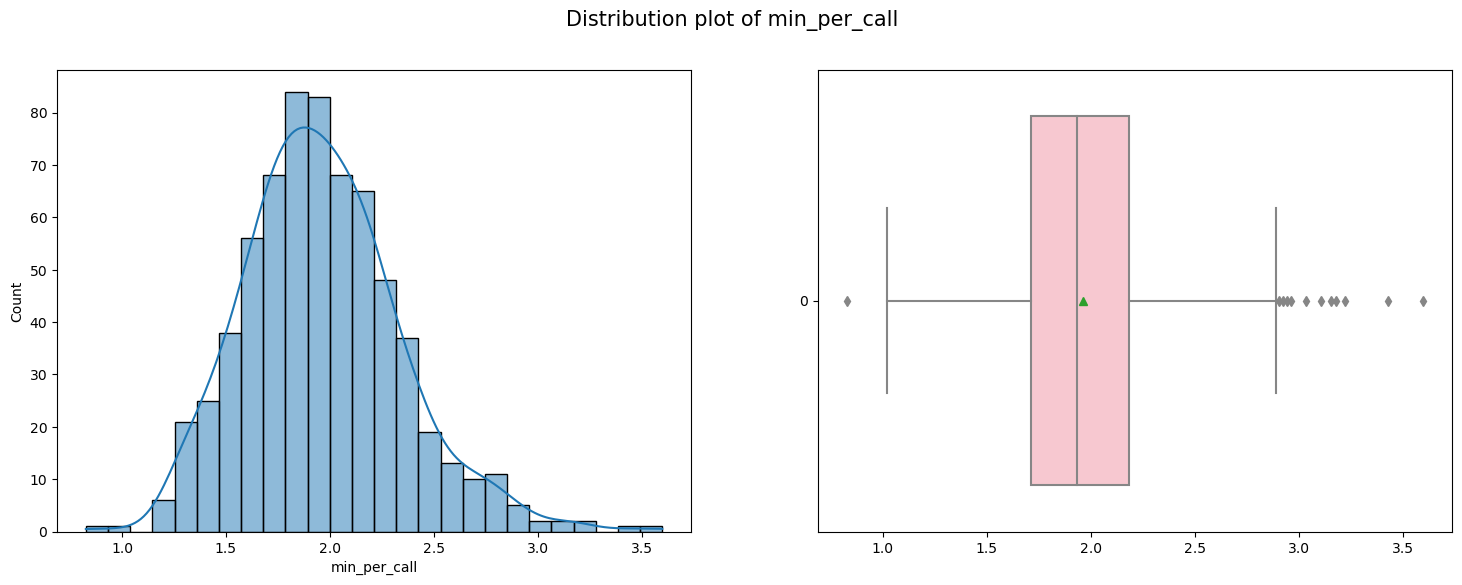

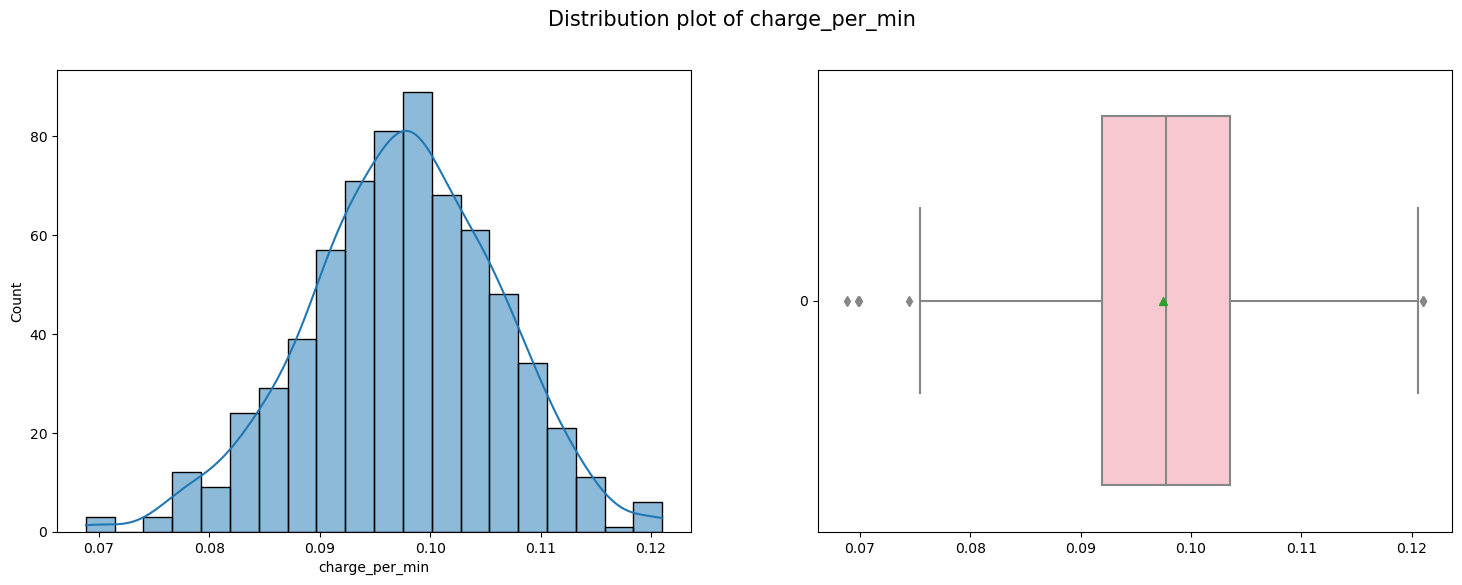

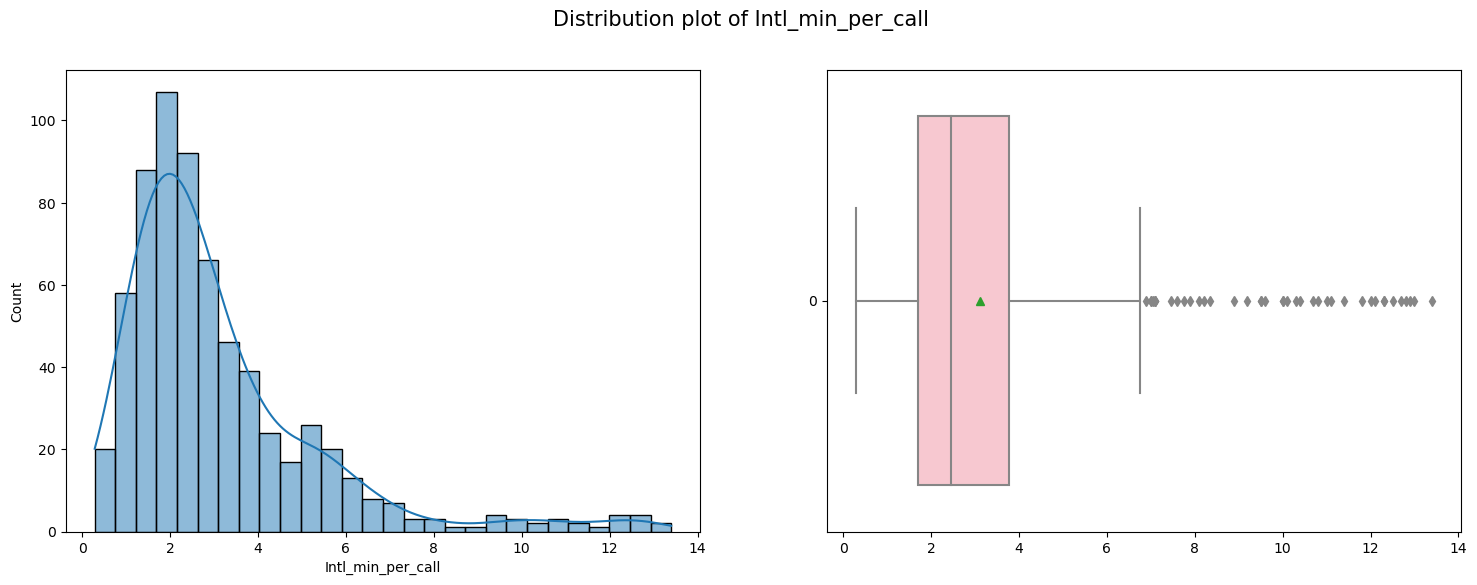

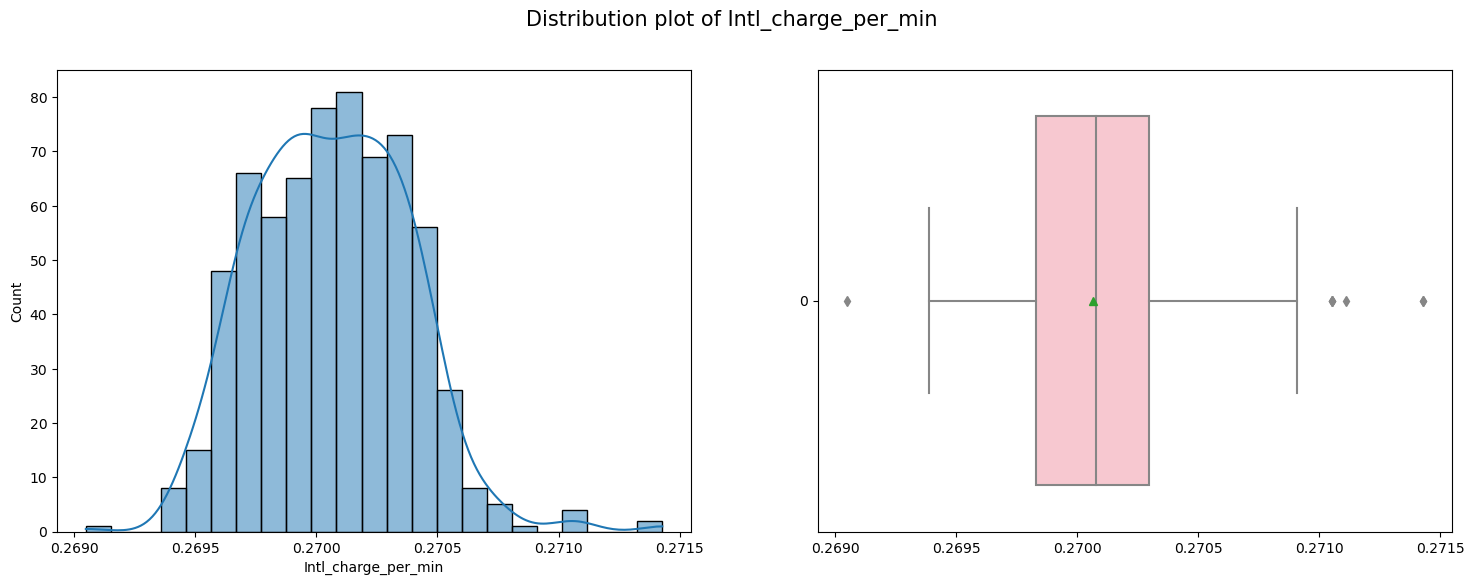

In [50]:
# Chart - 2 Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(data[col], ax = axes[0],kde = True)
    sns.boxplot(data[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

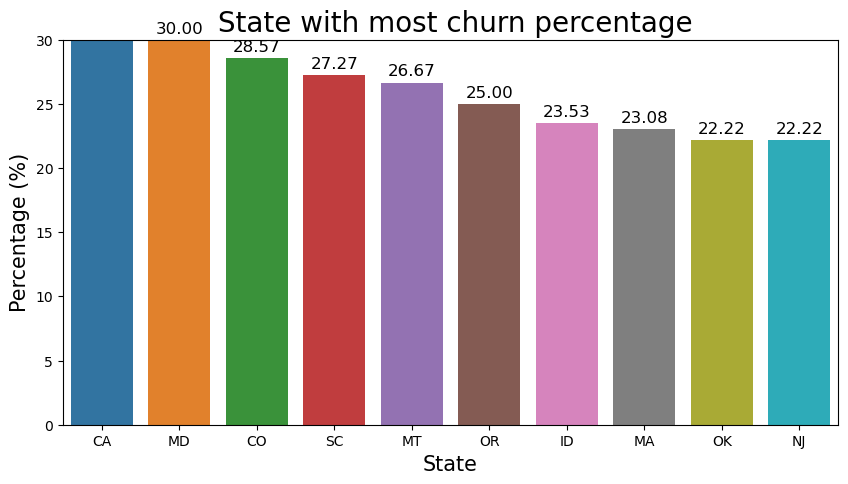

In [51]:
# Chart - 3  State vs. average true churn percentage visualization code

# Vizualizing top 10 churned state
plt.figure(figsize=(10,5))
bar1 = ((data.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,30)
plt.show()

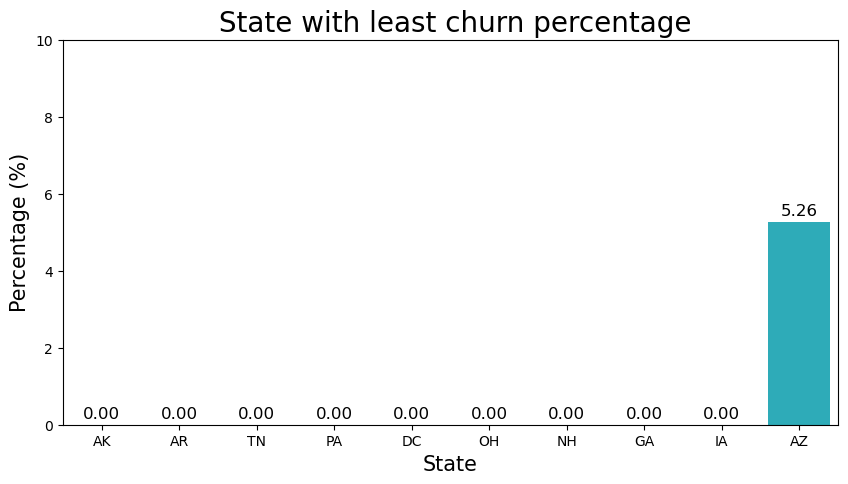

In [52]:
# Vizualizing bottom 10 churned state
plt.figure(figsize=(10,5))
bar1 = ((data.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage", fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of y axis from 0 to 10
plt.ylim(0,10)
plt.show()

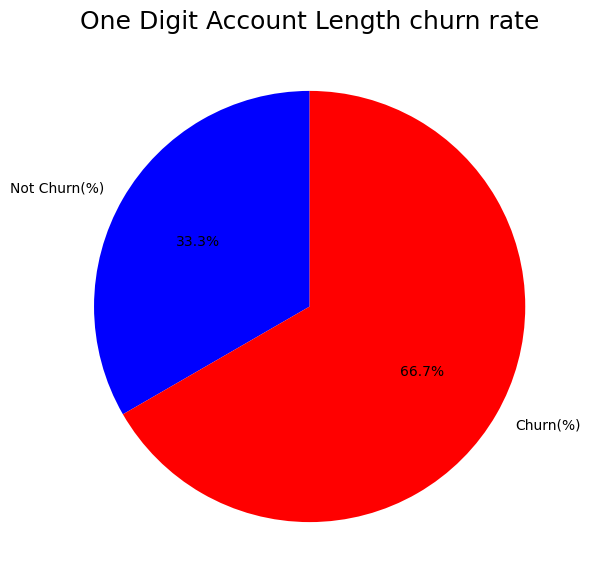

In [53]:
import matplotlib.pyplot as plt

# Assuming 'one_length' is a list of numerical values
one_length = [10, 20]

# Assuming you want to label them as 'Not Churn(%)' and 'Churn(%)'
labels = ['Not Churn(%)', 'Churn(%)']

# Specify colors if needed
colors = ['blue', 'red']

plt.figure(figsize=(15, 7))
plt.pie(one_length, labels=labels, startangle=90, colors=colors, autopct="%1.1f%%")
plt.title('One Digit Account Length churn rate', fontsize=18)
plt.show()


Churn
False    268
True      44
dtype: int64
 


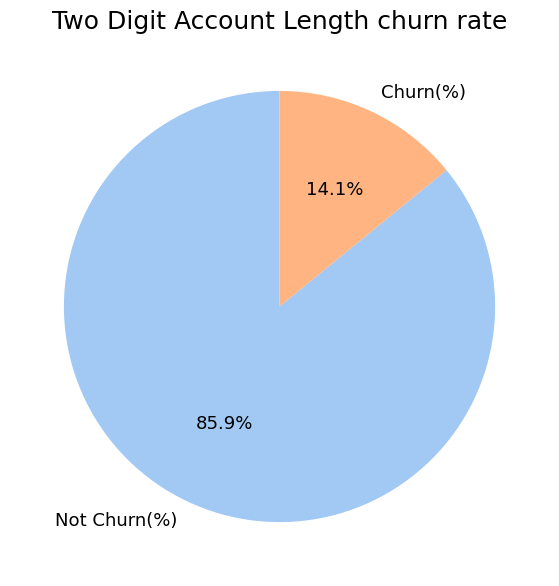

In [57]:
# Two Digit Account Length
two_account=data[(data['Account length']<=99) & (data['Account length']>=10)].loc[:,['Churn']].value_counts()
print(two_account)
print(" ")

# Visualizing Two Digit Account Length Based on Churn percentage
#color palette selection
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting pie chart
plt.pie(two_account, labels=['Not Churn(%)','Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('Two Digit Account Length churn rate', fontsize=18)
plt.show()

Churn
False    299
True      51
dtype: int64
 


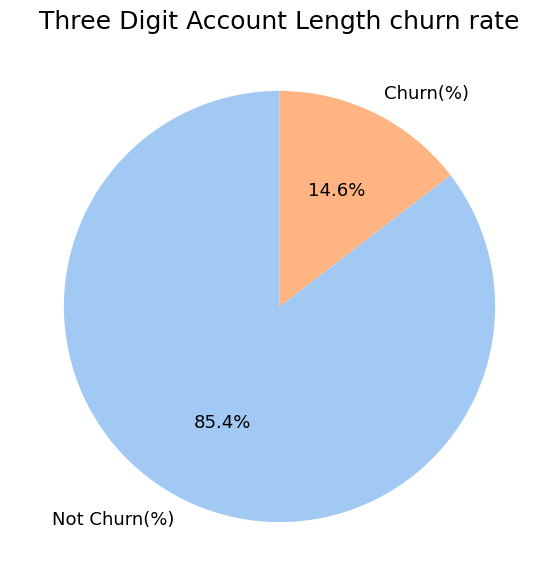

In [58]:
# Three Digit Account Length
three_account=data[(data['Account length']<=data['Account length'].max()) & (data['Account length']>=100)].loc[:,['Churn']].value_counts()
print(three_account)
print(" ")

# Visualizing Three Digit Account Length Based on Churn percentage
#color palette selection
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting data on chart using seaborn
plt.pie(three_account, labels=['Not Churn(%)','Churn(%)'],startangle=90 , colors=colors, autopct="%1.1f%%",textprops = textprops)
plt.title('Three Digit Account Length churn rate', fontsize=18)
plt.show()

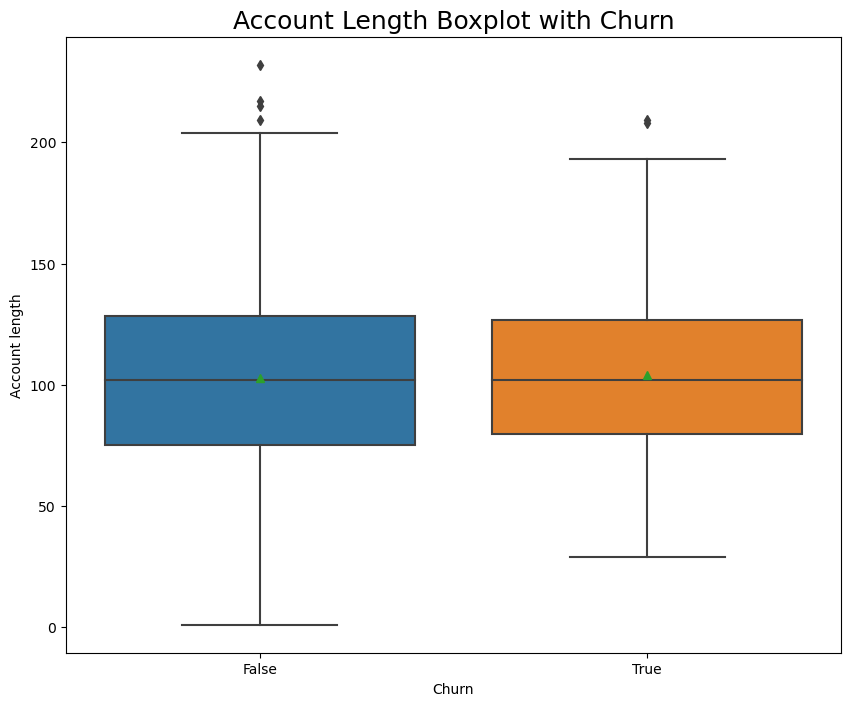

In [60]:
# Box Plot for Account Length attribute
plt.figure(figsize=(10,8))
sns.boxplot(data=data, x='Churn', y='Account length', showmeans = True)
plt.title('Account Length Boxplot with Churn', fontsize=18)
plt.show()

No     614
Yes     53
Name: International plan, dtype: int64
 


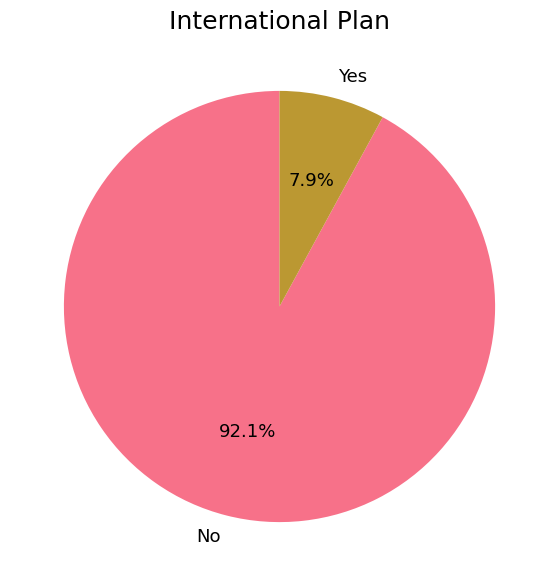

In [61]:
# Chart - 5 visualization code

# data for international plan
inter_plan = data['International plan'].value_counts()
print(inter_plan)
print(" ")

# Visualizing Percentage of customers taken international plan
#color palette selection
colors = sns.color_palette('husl')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting pie chart
plt.pie(inter_plan, labels=['No','Yes'],startangle=90 , colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('International Plan', fontsize=18)
plt.show()

In [62]:
# Assigning values for furthur charts
i1 = data['International plan'].unique()
i2 = data.groupby('International plan')['Churn'].mean()*100
i3 = data.groupby(['International plan'])['Total intl charge'].mean()
i4 = data.groupby(["Churn"])['Total intl minutes'].mean()

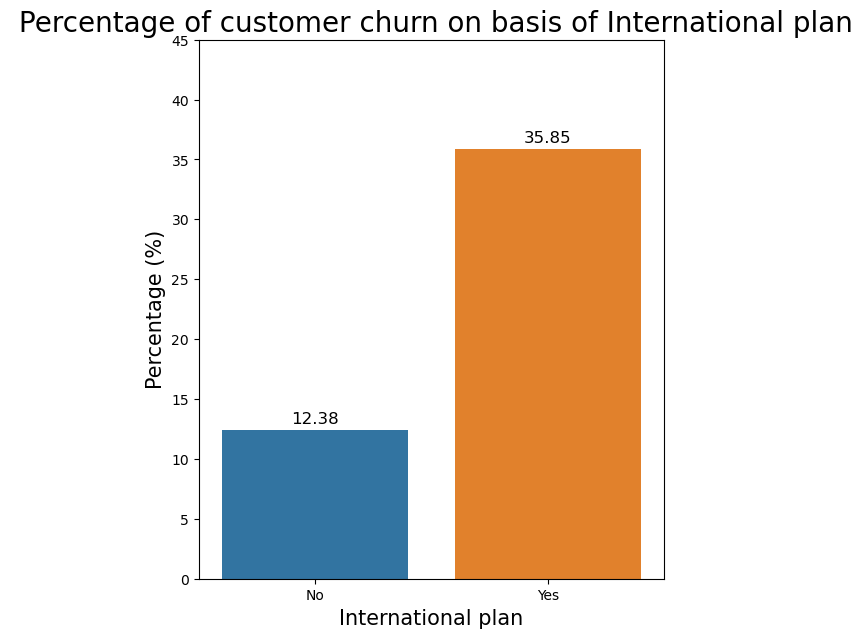

In [63]:
# Visualizing code for people churning percentage having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.ylim(0,45)
plt.show()

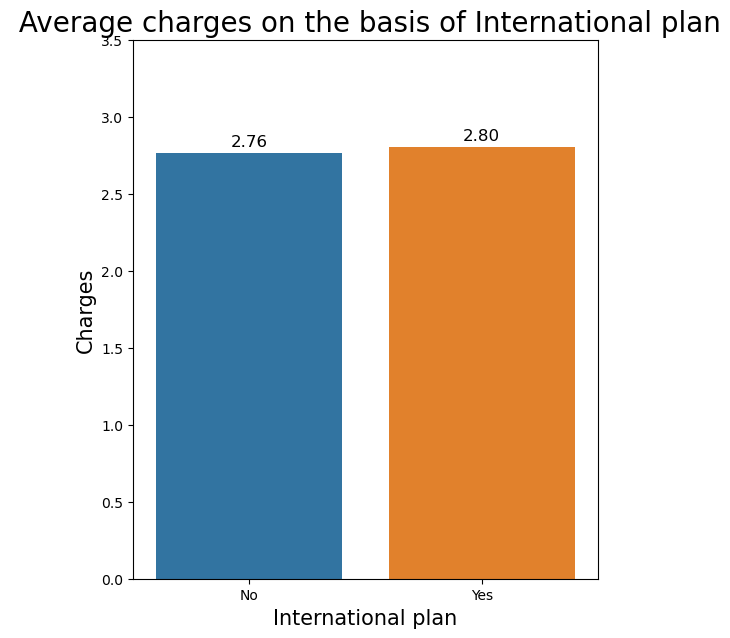

In [64]:
# Visualizing code for average calling charge of customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i3)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average charges on the basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Charges', fontsize = 15)
plt.ylim(0,3.5)
plt.show()

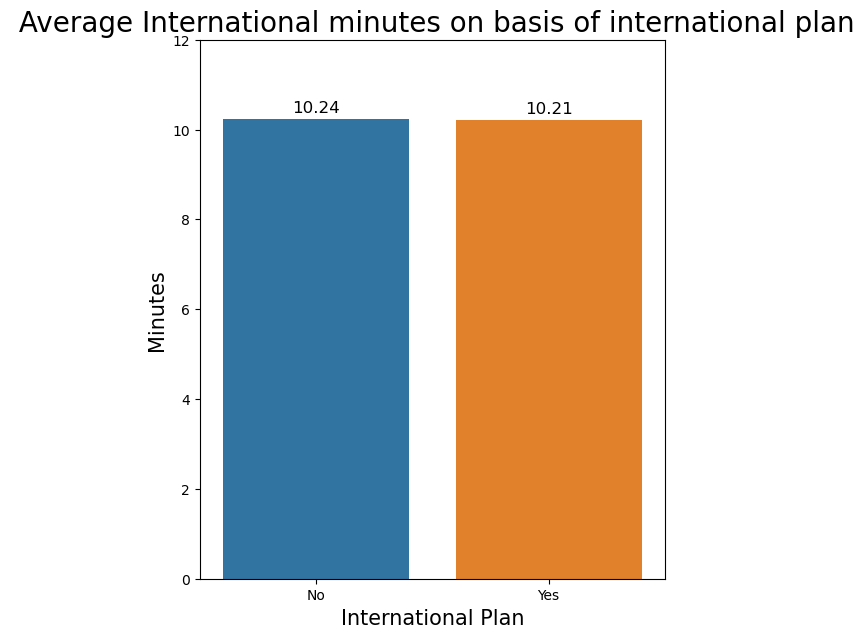

In [65]:
# Visualizing code for average minutes talked by customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i4)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average International minutes on basis of international plan", fontsize = 20)
plt.xlabel('International Plan', fontsize = 15)
plt.ylabel('Minutes', fontsize = 15)
plt.ylim(0,12)
plt.show()

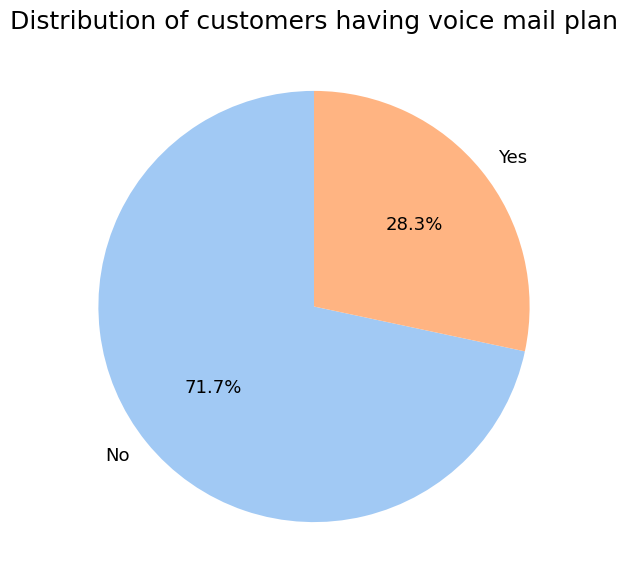

In [66]:
# Chart - 6 visualization code

# data for voice mail plan
voice = data['Voice mail plan'].value_counts()

# vizualizing code for customers percentage having voice mail plan

#color palette selection
palette_color = sns.color_palette('pastel')
textprops = {'fontsize':13}

# plotting chart of voice mail
plt.figure(figsize=(9,7))
plt.pie(voice, labels=['No','Yes'],startangle=90 , colors=palette_color, autopct="%1.1f%%",textprops = textprops)
plt.title('Distribution of customers having voice mail plan', fontsize=18)
plt.show()

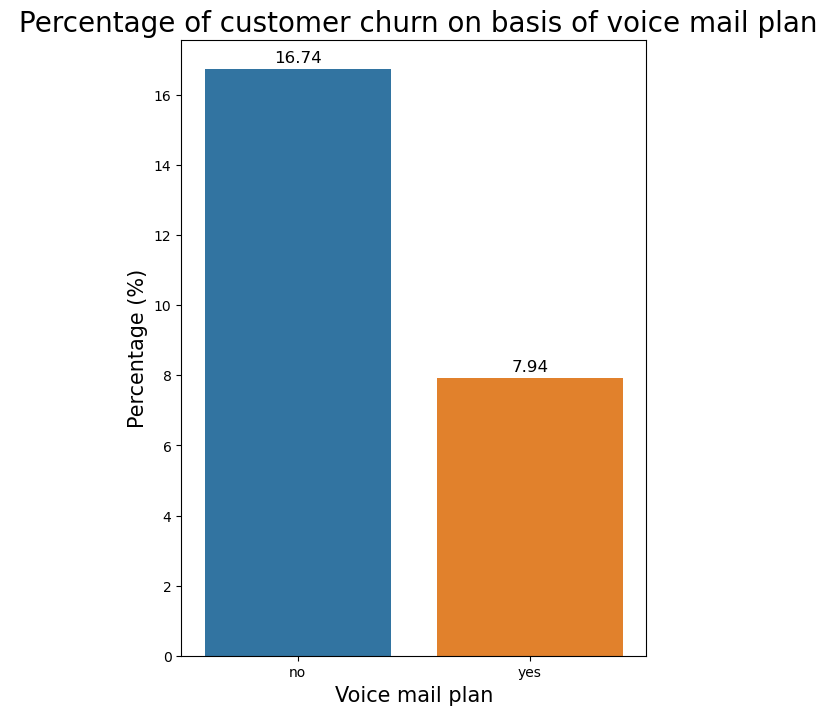

In [67]:
# Vizualizing code for customers churning while having voice mail plan

cc1=list(['no','yes'])
cc2=data.groupby('Voice mail plan')['Churn'].mean()*100

plt.figure(figsize=(6,8))
plots = sns.barplot(x=cc1,y=cc2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of voice mail plan", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

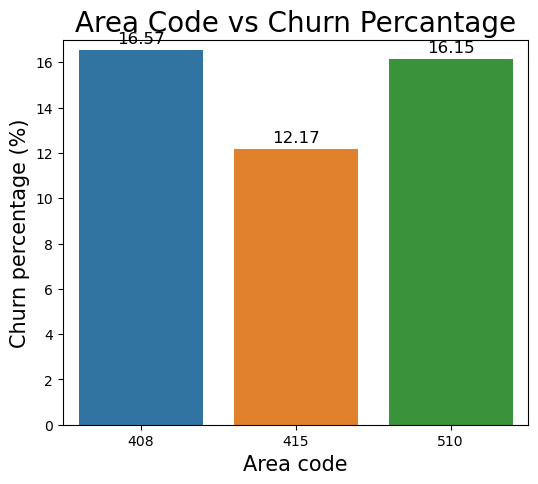

In [68]:
# Chart - 7 visualization code
# Visualizing code for Area Code wise average churn percentage
a1= data['Area code'].unique()
b1= data.groupby('Area code')['Churn'].mean()*100

plt.figure(figsize=(6,5))
plots = sns.barplot(x=a1, y=b1)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Area Code vs Churn Percantage',fontsize=20)
plt.xlabel('Area code', fontsize = 15)
plt.ylabel('Churn percentage (%)', fontsize = 15)
plt.ylim(0,17)
plt.show()

In [69]:
# Chart - 8 visualization code
# Average of total day calls, total day minutes & total day charge of churn
cn_dcalls = pd.DataFrame(data.groupby(["Churn"])['Total day calls'].mean())
print(cn_dcalls)
print('')
cn_dm = pd.DataFrame(data.groupby(["Churn"])['Total day minutes'].mean())
print(cn_dm)
print('')
cn_dc = pd.DataFrame(data.groupby(["Churn"])['Total day charge'].mean())
print(cn_dc)

       Total day calls
Churn                 
False       100.776224
True        101.905263

       Total day minutes
Churn                   
False         175.460140
True          213.991579

       Total day charge
Churn                  
False         29.828829
True          36.379053


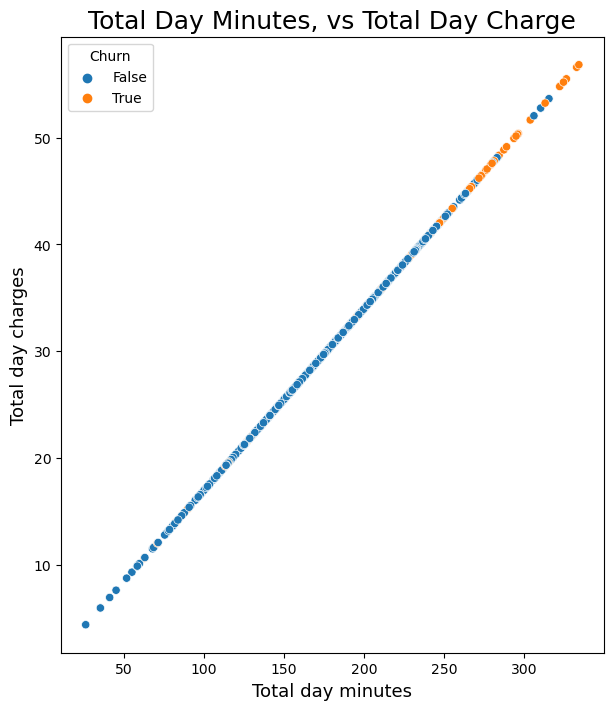

In [71]:
# Vizualizing Total day minutes vs total day charge
plt.figure(figsize=(7,8))
sns.scatterplot(data=data, x="Total day minutes", y="Total day charge", hue="Churn")
plt.title('Total Day Minutes, vs Total Day Charge', fontsize=18)
plt.xlabel('Total day minutes',fontsize = 13)
plt.ylabel('Total day charges',fontsize = 13)
plt.show()

In [72]:
# Average of total eve calls, total eve minutes & total evening charge of churn
cn_ecalls = pd.DataFrame(data.groupby(["Churn"])['Total eve calls'].mean())
print(cn_ecalls)
print(" ")
cn_em = pd.DataFrame(data.groupby(["Churn"])['Total eve minutes'].mean())
print(cn_em)
print(" ")
cn_ec = pd.DataFrame(data.groupby(["Churn"])['Total eve charge'].mean())
print(cn_ec)

       Total eve calls
Churn                 
False       100.047203
True        103.063158
 
       Total eve minutes
Churn                   
False         199.799650
True          224.764211
 
       Total eve charge
Churn                  
False         16.983024
True          19.105053


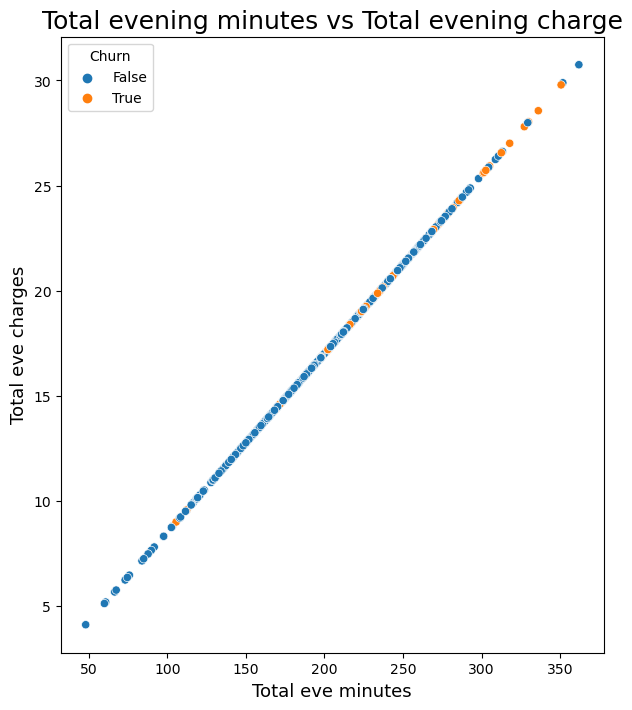

In [74]:
# Vizualizing total evening minutes vs total evening charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=data)
plt.title('Total evening minutes vs Total evening charge', fontsize=18)
plt.xlabel('Total eve minutes',fontsize = 13)
plt.ylabel('Total eve charges',fontsize = 13)
plt.show()

In [75]:
# Average of total night calls, total night minutes & total night charge of churn
cn_ncalls = pd.DataFrame(data.groupby(["Churn"])['Total night calls'].mean())
print(cn_ncalls)
print(" ")
cn_nm = pd.DataFrame(data.groupby(["Churn"])['Total night minutes'].mean())
print(cn_nm)
print(" ")
cn_nc = pd.DataFrame(data.groupby(["Churn"])['Total night charge'].mean())
print(cn_nc)

       Total night calls
Churn                   
False         100.258741
True           99.242105
 
       Total night minutes
Churn                     
False           198.815385
True            204.923158
 
       Total night charge
Churn                    
False            8.946731
True             9.221789


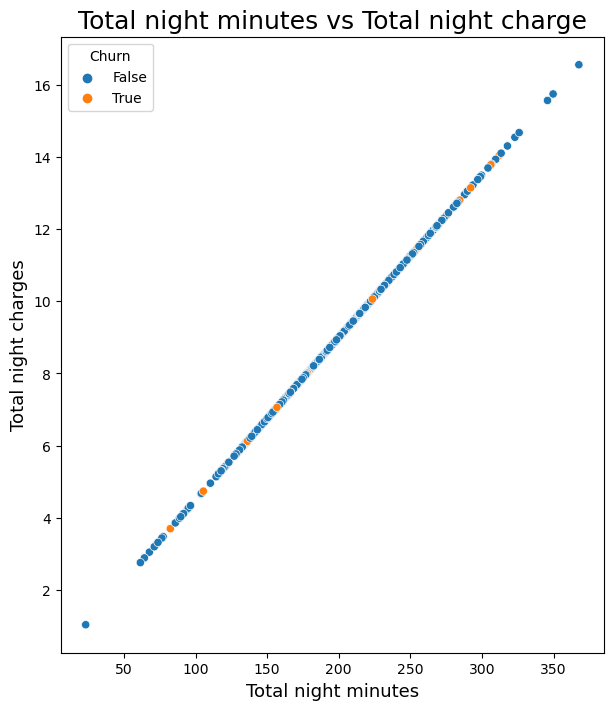

In [76]:
# Vizualizing Total night minutes vs total night charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=data)
plt.title('Total night minutes vs Total night charge', fontsize=18)
plt.xlabel('Total night minutes',fontsize = 13)
plt.ylabel('Total night charges',fontsize = 13)
plt.show()

In [77]:
# Table of average calls of total day, eve & night on basis of churn
cn_calls = pd.merge(pd.merge(cn_dcalls,cn_ecalls, on = 'Churn'),cn_ncalls,on = 'Churn').round(2).T
cn_calls

Churn,False,True
Total day calls,100.78,101.91
Total eve calls,100.05,103.06
Total night calls,100.26,99.24


<Figure size 900x600 with 0 Axes>

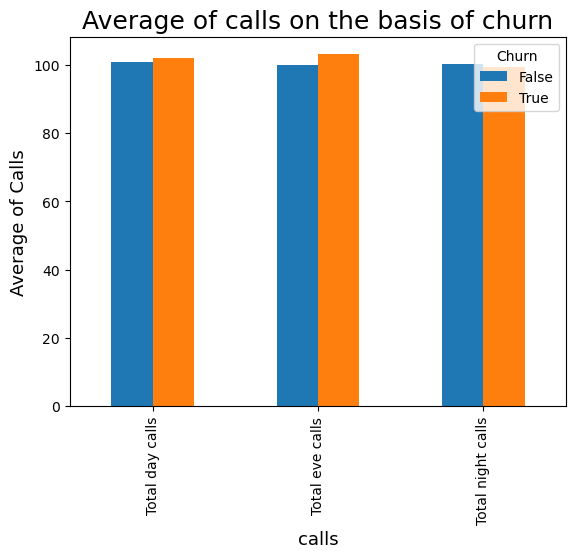

In [78]:
# Bar plot of above table
plt.figure(figsize=(9,6))
cn_calls.plot(kind='bar',ylabel='mean')
plt.title('Average of calls on the basis of churn', fontsize=18)
plt.xlabel("calls", fontsize = 13)
plt.ylabel('Average of Calls',fontsize = 13)
plt.show()

In [79]:
# Table of average minutes of total day, eve & night on basis of churn
cn_minutes = pd.merge(pd.merge(cn_dm,cn_em, on = 'Churn'),cn_nm,on = 'Churn').round(2).T
cn_minutes

Churn,False,True
Total day minutes,175.46,213.99
Total eve minutes,199.80,224.76
Total night minutes,198.82,204.92


<Figure size 900x600 with 0 Axes>

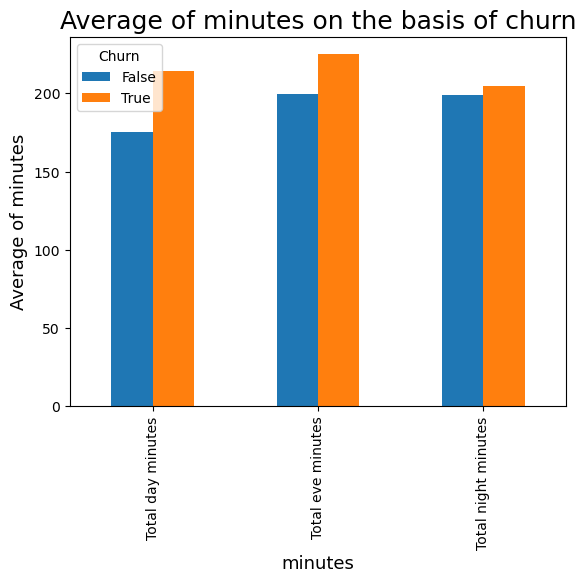

In [80]:
# Bar plot of above table
plt.figure(figsize=(9,6))
cn_minutes.plot(kind='bar',ylabel='mean')
plt.title('Average of minutes on the basis of churn', fontsize=18)
plt.xlabel("minutes", fontsize = 13)
plt.ylabel('Average of minutes',fontsize = 13)
plt.show()

In [81]:
# Table of average charges of total day, eve & night on basis of churn
cn_charges = pd.merge(pd.merge(cn_dc,cn_ec, on = 'Churn'),cn_nc,on = 'Churn').round(2).T
cn_charges

Churn,False,True
Total day charge,29.83,36.38
Total eve charge,16.98,19.11
Total night charge,8.95,9.22


<Figure size 900x700 with 0 Axes>

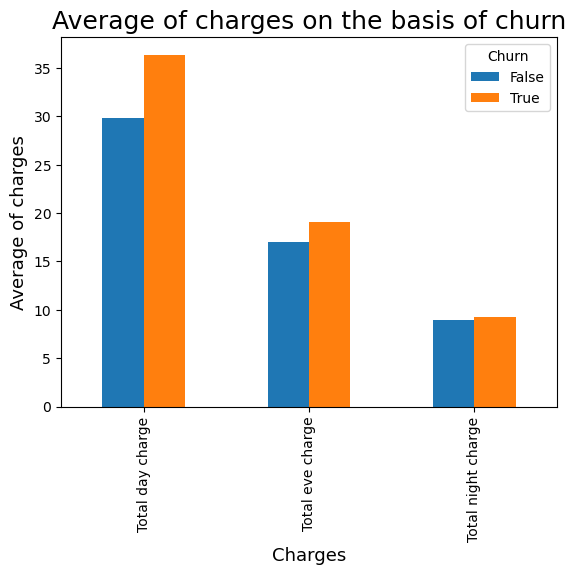

In [82]:
# Bar plot of above table
plt.figure(figsize=(9,7))
cn_charges.plot(kind='bar',ylabel='mean')
plt.title('Average of charges on the basis of churn', fontsize=18)
plt.xlabel("Charges", fontsize = 13)
plt.ylabel('Average of charges',fontsize = 13)
plt.show()

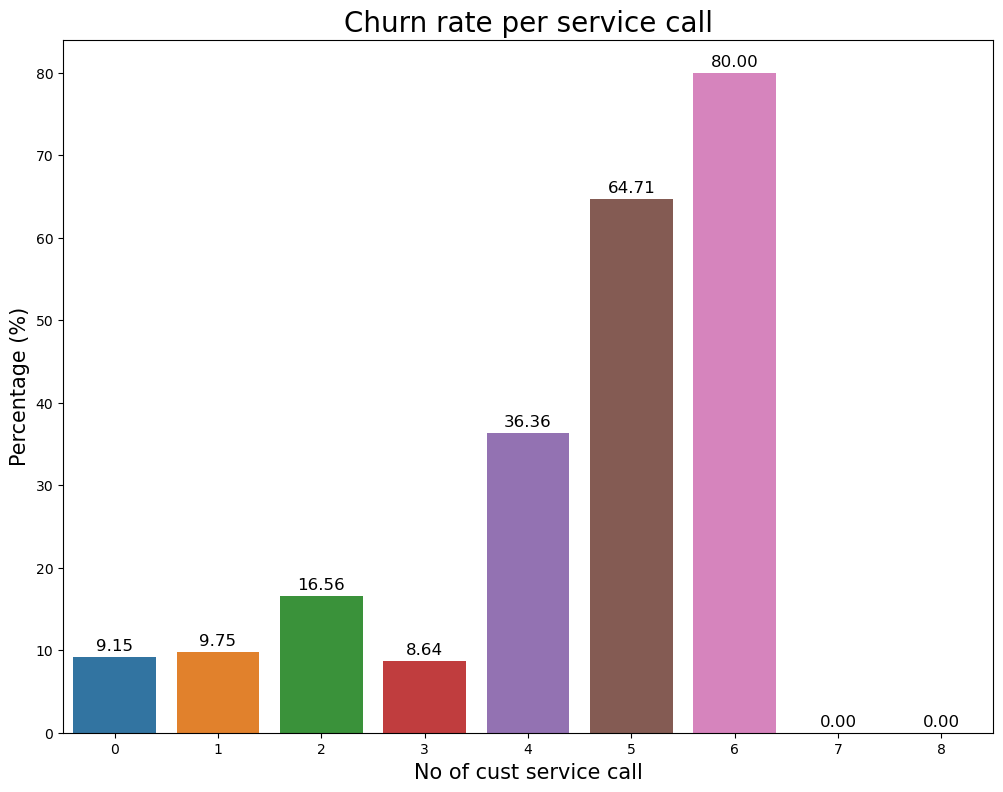

In [83]:
# Chart - 9 visualization code
# data for customer service calls
service = pd.DataFrame(data.groupby('Customer service calls')['Churn'].mean()*100)

# Visualizing churn rate per customer service calls
plt.figure(figsize=(12,9))
plots = sns.barplot(x=service.index, y=service['Churn'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
plt.show()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_7912\3590600605.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


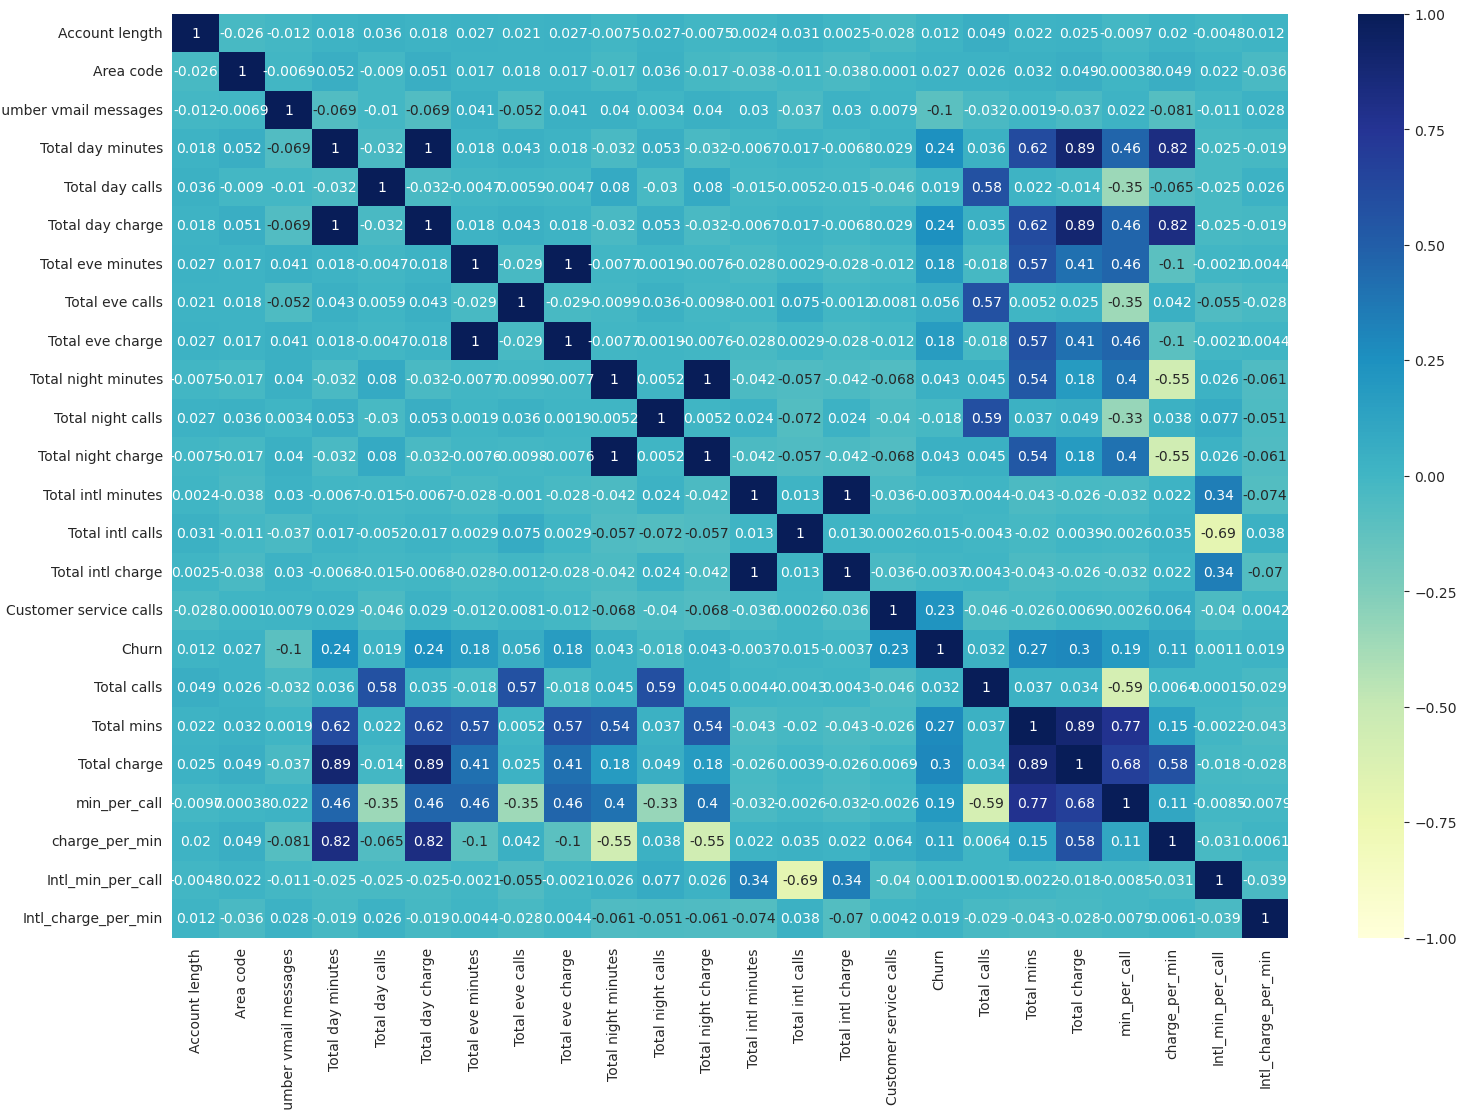

In [84]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
corr = data.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = False

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 12))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")


In [86]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl charge,Customer service calls,Churn,Total calls,Total mins,Total charge,min_per_call,charge_per_min,Intl_min_per_call,Intl_charge_per_min
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,2.35,1,False,267,751.9,70.97,2.816105,0.094388,2.175000,0.270115
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,3.43,4,True,331,566.4,50.77,1.711178,0.089636,2.116667,0.270079
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,1.46,4,True,292,811.3,90.83,2.778425,0.111956,0.600000,0.270370
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,2.08,2,False,310,437.3,38.97,1.410645,0.089115,1.283333,0.270130
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,3.00,1,False,316,513.1,46.60,1.623734,0.090821,11.100000,0.270270


In [1]:
# Assuming 'data' is your DataFrame and 'cols' are the columns you want to include in the correlation matrix
correlation = data[cols].corr()

corr_array = np.array(correlation)

# Plotting heatmap
trace = go.Heatmap(z=corr_array,
                   x=matrix_cols,
                   y=matrix_cols,
                   colorscale="Viridis",
                   colorbar=dict(title="Pearson Correlation coefficients", titleside="right"),
                   )

layout = go.Layout(dict(title="Correlation matrix",
                        autosize=False,
                        height=720,
                        width=720,
                        xaxis=dict(tickfont=dict(size=9)),
                        yaxis=dict(tickfont=dict(size=9)),
                        )
                   )

data = [trace]

fig = go.Figure(data=data, layout=layout)
fig.show()


NameError: name 'data' is not defined

In [88]:
def data_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        #subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

# Define the studied or used independent features (columns) as well as the target  
target_col = ['Churn']

#defining the studied or used independent features (columns) as well the target  
cols = [i for i in data.columns if i not in target_col]
# Assuming df_telecom_og is a DataFrame defined earlier in your code
# Define the studied or used independent features (columns) as well as the target  
target_col = ['Churn']
cols = [i for i in data.columns if i not in target_col]

# Splitting the principal training dataset into subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(data[cols], data[target_col], 
                                                    test_size=0.25, random_state=111)



In [115]:

#decision tree classifier
import chart_studio.plotly as py
from sklearn.tree import DecisionTreeClassifier
from plotly.subplots import make_subplots
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display



In [116]:
decision_tree = DecisionTreeClassifier(max_depth=9, random_state=123, splitter="best", criterion="gini")


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming df is your DataFrame with categorical_column1 and other columns
data = {'categorical_column1': ['state', 'area code', 'international plan', 'account length'],
        'numerical_column': [1, 2, 3, 4],
        'label': [0, 1, 0, 1]}

df = pd.DataFrame(data)

# Separate features and labels
X = df[['categorical_column1', 'numerical_column']]
y = df['label']

# Use LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()
X['categorical_column1'] = label_encoder.fit_transform(X['categorical_column1'])

# Use OneHotEncoder to convert the categorical variable into binary columns
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = onehot_encoder.fit_transform(X[['categorical_column1']])
X_encoded = pd.DataFrame(X_encoded, columns=[f'encoded_{i}' for i in range(X_encoded.shape[1])])

# Concatenate the encoded features with the numerical column
X = pd.concat([X_encoded, X[['numerical_column']]], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 0.00%


C:\Users\HomePC\AppData\Local\Temp\ipykernel_10368\4067148435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['categorical_column1'] = label_encoder.fit_transform(X['categorical_column1'])


Accuracy: 0.9029850746268657
Confusion Matrix:
[[110   9]
 [  4  11]]
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.92      0.94       119
        True       0.55      0.73      0.63        15

    accuracy                           0.90       134
   macro avg       0.76      0.83      0.79       134
weighted avg       0.92      0.90      0.91       134



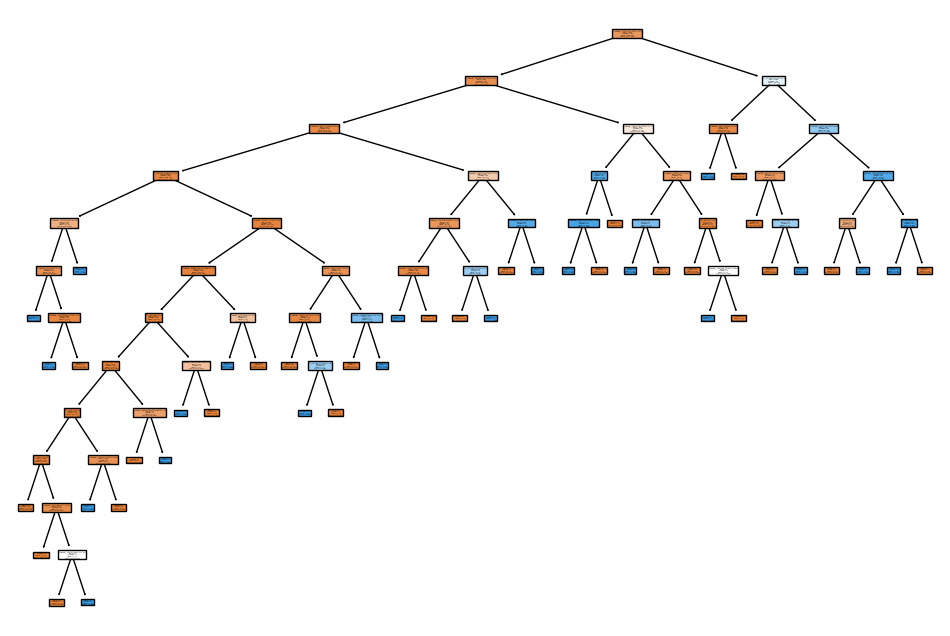

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load your telecom churn data (replace 'your_dataset.csv' with your actual dataset)
# The dataset should have features (X) and a target variable (y)
# For this example, I'll assume you have a CSV file named 'telecom_churn.csv'
data = pd.read_csv('kegga.csv')

# Assuming 'Churn' is the target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Create a preprocessor for handling categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and the decision tree classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Visualize the decision tree (optional)
plt.figure(figsize=(12, 8))
tree.plot_tree(pipeline.named_steps['classifier'], filled=True, feature_names=preprocessor.get_feature_names_out(X.columns), class_names=['Not Churned', 'Churned'])
plt.show()
